In [1]:
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp

np.seterr(all="ignore")

from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io import update_logging_level
from threeML.utils.data_download.Fermi_LAT.download_LAT_data import LAT_dataset
from astropy.io import fits as pyfits

SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title


# This if you want to toggle different type of logging level.
update_logging_level("INFO")
log.error("error")
log.info("info")
log.debug("debug")

01:59:50 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=737849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=929645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=609283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=352681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

01:59:51 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=972770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=176421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

01:59:53 ERROR     error                                                                           ]8;id=574417;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64058/3699701126.py\3699701126.py]8;;\:]8;id=982269;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64058/3699701126.py#29\29]8;;\

         INFO      info                                                                            ]8;id=933392;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64058/3699701126.py\3699701126.py]8;;\:]8;id=616982;file:///var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/ipykernel_64058/3699701126.py#30\30]8;;\

## GtBurst
Gtburst contains all the classes and methods to perform Fermi LAT data. It internally uses the official fermitools software. Here an example to list the IRFS available:


In [2]:
from GtBurst import IRFS

irfs = IRFS.IRFS.keys()
print(irfs)

odict_keys(['p7rep_transient', 'p7rep_source', 'p7rep_clean', 'p7rep_ultraclean', 'p8r2_transient100e', 'p8r2_transient100', 'p8r2_transient020e', 'p8r2_transient020', 'p8r2_transient010e', 'p8r2_transient010', 'p8r2_source', 'p8r2_clean', 'p8r2_ultraclean', 'p8r2_ultracleanveto', 'p8r2_transient100s', 'p8r2_transient015s', 'p8_transient100e', 'p8_transient100', 'p8_transient020e', 'p8_transient020', 'p8_transient010e', 'p8_transient010', 'p8_source', 'p8_clean', 'p8_ultraclean', 'p8_ultracleanveto', 'p8_sourceveto', 'p8_transient100s', 'p8_transient015s'])


## The LAT Transient Builder
Let's see how to make a plug in for the unbinned analysis of Fermi LAT data. First we use the information form a triggered GRB to obtain MET, RA and DEC, that are needed for the analysis.


In [3]:
from GtBurst.TriggerSelector import TriggerSelector

myFavoriteGRB = "bn190114873"


def findGRB(grb_name):
    a = TriggerSelector()
    a.downloadList()
    myGRB = {}
    for x in a.data:
        if x[0] == myFavoriteGRB:
            myGRB["MET"] = float(x[1])
            myGRB["RA"] = float(x[3])
            myGRB["DEC"] = float(x[4])
            myGRB["ERR"] = float(x[5])
            return myGRB
            pass
    return None

In [4]:
myGRB = findGRB(myFavoriteGRB)
print(myGRB)

{'MET': 569192227.626, 'RA': 54.51, 'DEC': -26.939, 'ERR': 0.05}


Then, we download LAT data and we build the transient builder, we want to analyze 1000 seconds since the trigger. Let's start download the data:


In [5]:
tstart = 0
tstop = 1000

In [6]:
myLATdataset = LAT_dataset()

myLATdataset.make_LAT_dataset(
    ra=myGRB["RA"],
    dec=myGRB["DEC"],
    radius=12,
    trigger_time=myGRB["MET"],
    tstart=tstart,
    tstop=tstop,
    data_type="Extended",
    destination_directory=".",
    Emin=100.0,
    Emax=10000.0,
)  # Energies are MeV (this is from 100 MeV to 10 GeV)

02:00:07 INFO      Query parameters:                                                       ]8;id=757422;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=616903;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#262\262]8;;\

         INFO                          coordfield = 54.5100,-26.9390                       ]8;id=692891;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=749779;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         coordsystem = J2000                                  ]8;id=934511;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=422965;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          shapefield = 12                                     ]8;id=653951;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=712561;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                           timefield = 569192227.626,569193227.626            ]8;id=238568;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=786551;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                            timetype = MET                                    ]8;id=307939;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=463302;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         energyfield = 100.000,10000.000                      ]8;id=910071;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=411415;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO              photonOrExtendedOrNone = Extended                               ]8;id=701344;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=635410;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                         destination = query                                  ]8;id=230367;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=290249;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO                          spacecraft = checked                                ]8;id=618943;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=882882;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#266\266]8;;\

         INFO      Query ID: 86ad4d2b3b3e5065f0f0a976e6fc8315                              ]8;id=146142;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=605391;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#271\271]8;;\

02:00:08 INFO      Estimated complete time for your query: 15 seconds                      ]8;id=510811;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=23615;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#427\427]8;;\

         INFO      If this download fails, you can find your data at                       ]8;id=798053;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=825223;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#436\436]8;;\
                  https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/QueryResults.cgi?id=L2210052                         
                  20009B4ACFA2F45 (when ready)                                                                     

02:00:19 INFO      Downloading FT1 and FT2 files...                                        ]8;id=226107;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=60314;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#526\526]8;;\

02:00:22 WARNING   Only one FT1 file provided. Skipping the merge...                        ]8;id=95460;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=833084;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#98\98]8;;\

Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.rsp...
time -p gtselect infile=./bn190114873/gll_ft1_tr_bn190114873_v00.fit outfile=__temp_ft1.fits ra=54.51 dec=-26.939 rad=15.0 tmin=569192226.626 tmax=569193228.626 emin=10.0 emax=300000.0 zmin=0.0 zmax=110.0 evclass="INDEF" evtype="INDEF" convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.15
user 0.09
sys 0.04
Writing ./bn190114873/gll_cspec_tr_bn190114873_v00.pha...
 *  Get energy binning from the response matrix...

    done.

 *  Run gtbindef and gtbin and bin in energy and time...



time -p gtbindef bintype="E" binfile=__ebins.txt outfile=__energyBins.fits energyunits="keV" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbindef version HEAD
real 0.23
user 0.02
sys 0.02
time -p gtbin evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/__temp_ft1.fits scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit outfile=__gtllebin__pha2.pha algorithm="PHA2" ebinalg="FILE" emin=30.0 emax=200000.0 ebinfile=__energyBins.fits tbinalg="LIN" tstart=569192227.626 tstop=569193227.626 dtime=4.096 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=1 clobber=yes debug=no gui=no mode="ql"


This is gtbin version HEAD


real 3.04
user 2.58
sys 0.44

    done.

 *  Transform gtbin output in CSPEC format...

    done.

 *  Updating keywords in the headers of the CSPEC file...

    done.

gtllebin done!


We want perform a time resolved analysis. So, first we look at the data. We can play with the ROI selection and the cut.


In [7]:
roi = 10
zmax = 110.0
thetamax = 180.0
irfs = "p8_transient020e"
strategy = "time"
myLATdataset.extract_events(roi, zmax, irfs, thetamax, strategy="time")

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192227.626 tstop=569193227.626 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.11
user 0.06
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192227.626 tmax=569193227.626 emin=100.0 emax=10000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=

Done.
real 0.13
user 0.09
sys 0.03

Selected 251 events.


02:00:26 INFO      Extracted 251 events                                                    ]8;id=864886;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py\download_LAT_data.py]8;;\:]8;id=827975;file:///Users/runner/work/threeML/threeML/threeML/utils/data_download/Fermi_LAT/download_LAT_data.py#669\669]8;;\

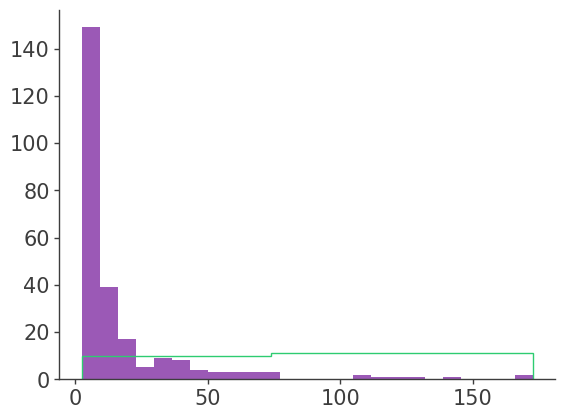

In [8]:
%matplotlib inline
event_file = pyfits.open(myLATdataset.filt_file)
event_times = sorted(event_file["EVENTS"].data["TIME"] - myGRB["MET"])
intervals = event_times[0::10]
_ = plt.hist(event_times)
_ = plt.hist(event_times, intervals, histtype="step")
# plt.show()

tstarts and tstops are defined as strings, with somma separated values for the starts and the ends of the time bins: For example tsrats="0,1,10" and tstops="1,10,20". To convert arrays in string we use these few lines of code:


In [9]:
tstarts = tstops = ""
for t0, t1 in zip(intervals[:-1], intervals[1:]):
    tstarts += "%.4f," % t0
    tstops += "%.4f," % t1
    pass
tstarts = tstarts[:-1].replace("-", "\\-")
tstops = tstops[:-1].replace("-", "\\-")

We can now make an instance the LAT transient builder


In [10]:
analysis_builder = TransientLATDataBuilder(
    myLATdataset.grb_name,
    outfile=myLATdataset.grb_name,
    roi=roi,
    tstarts=tstarts,
    tstops=tstops,
    irf=irfs,
    zmax=zmax,
    galactic_model="template",
    particle_model="isotr template",
    datarepository=".",
)
df = analysis_builder.display(get=True)

outfile                                                       190114873
roi                                                                  10
tstarts               2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.54...
tstops                3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.98...
zmax                                                              110.0
emin                                                              100.0
emax                                                           100000.0
irf                                                    p8_transient020e
galactic_model                                                 template
particle_model                                           isotr template
source_model                                                  PowerLaw2
tsmin                                                              20.0
strategy                                                           time
thetamax                                                        

In [11]:
tstops

'3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754'

The run method will run (using gtburst) all the fermitools needed to obtain the needed file for the likelihood analysis (livetimecubes, exposure maps. It will also perfom a simple likelihood analysis with the standard likelihood of the fermitools (pylikelihood). The dataproducts created here will be used by threeML to make the fit.


In [12]:
LAT_observations = analysis_builder.run(include_previous_intervals=True)

Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/scripts/doTimeResolvedLike.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtdiffrsp_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtltcube_mp.py
Changing permission to /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gttsmap_mp.py


02:00:27 INFO      About to run the following command:                                 ]8;id=984951;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=116246;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#636\636]8;;\
                  /usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermi                             
                  tools/GtBurst/scripts/doTimeResolvedLike.py 190114873 --outfile                                  
                  '190114873' --roi 10.000000 --tstarts                                                            
                  '2.6996,3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.68                             
                  89,7.0117,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165                             
                  ,17.7834,21.4962,30.0798,40.8747,48.7118,73.7262' --tstops                                       
                  '3.6358,3.9968,4.4024,4.7375,5.0909,5.5471,5.9896,6.3998,6.6889,7.01                             
                  17,7.2936,7.7731,8.2167,8.8763,9.6573,10.5680,12.0568,14.6165,17.783                             
                  4,21.4962,30.0798,40.8747,48.7118,73.7262,172.5754' --zmax                                       
                  110.000000 --emin 100.000000 --emax 100000.000000 --irf                                          
                  'p8_transient020e' --galactic_model 'template' --particle_model                                  
                  'isotr template' --source_model 'PowerLaw2' --tsmin 20.000000                                    
                  --strategy 'time' --thetamax 180.000000 --spectralfiles 'no'                                     
                  --liketype 'unbinned' --optimizeposition 'no' --datarepository '.'                               
                  --ltcube '' --expomap '' --ulphindex -2.000000 --flemin 100.000000                               
                  --flemax 10000.000000 --fgl_mode 'fast'                                                          

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   25.19240     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .29E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:54: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.71579     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .58E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Requested intervals:
------------------------------------------------------
2.6996               - 3.6358
3.6358               - 3.9968
3.9968               - 4.4024
4.4024               - 4.7375
4.7375               - 5.0909
5.0909               - 5.5471
5.5471               - 5.9896
5.9896               - 6.3998
6.3998               - 6.6889
6.6889               - 7.0117
7.0117               - 7.2936
7.2936               - 7.7731
7.7731               - 8.2167
8.2167               - 8.8763
8.8763               - 9.6573
9.6573               - 10.568
10.568               - 12.0568
12.0568              - 14.6165
14.6165              - 17.7834
17.7834              - 21.4962
21.4962              - 30.0798
30.0798              - 40.8747
40.8747              - 48.7118
48.7118              - 73.7262
73.7262              - 172.5754

Data files:
-----------
eventfile            /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit
ft2file      

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   4.786573     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   5.901543     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .70E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_3.6358-3.9968.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval3.6358-3.9968/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 10.72
user 9.55
sys 1.08
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeM

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   13.43105     FROM MIGRAD    STATUS=CONVERGED     67 CALLS       68 TOTAL
                     EDM=   .19E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   11.37565     FROM MIGRAD    STATUS=CONVERGED     74 CALLS       75 TOTAL
                     EDM=   .16E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  9.4%

  EXT PARAMETER                            

-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_4.4024-4.7375.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_4.4024-4.7375.xml 0.3350999355316162 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   7.632503     FROM MIGRAD    STATUS=CONVERGED     61 CALLS       62 TOTAL
                     EDM=   .99E-06  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  5.3%

  EXT PARAMETER                            

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_5.0909-5.5471.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='5.0909' tstop='5.5471' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   10.79486     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .15E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   6.844639     FROM MIGRAD    STATUS=CONVERGED     66 CALLS       67 TOTAL
                     EDM=   .31E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_5.5471-5.9896.xml irfs="P8R3_TRANSIENT020E_V3" evclsmin="INDEF" evclass="INDEF" evtype="INDEF" convert=no chatter=2 clobber=yes debug=no gui=no mode="ql"
adding source 4FGL J0322.6-3712e
adding source GalacticTemplate
adding source IsotropicTemplate
Working on...
/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval5.5471-5.9896/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 8.61
user 7.57
sys 0.97
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   8.317516     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .68E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   12.58093     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .10E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/MPLPlot.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure()


-> gtbuildxmlmodel xmlmodel='190114873_LAT_xmlmodel_6.3998-6.6889.xml' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' galactic_model='template' particle_model='isotr template' ra='54.51' dec='-26.939' fgl_mode='fast' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' source_model='PowerLaw2'

Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 

addFGLsources( 54.51 -26.939 18.0 190114873_LAT_xmlmodel_6.3998-6.6889.xml 0.2891000509262085 )
('SpatialMap', True)
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   18.30164     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_7.0117-7.2936.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='7.0117' tstop='7.2936' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   14.90094     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .44E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   13.18701     FROM MIGRAD    STATUS=CONVERGED     62 CALLS       63 TOTAL
                     EDM=   .24E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.5%

  EXT PARAMETER                            

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 10.47
user 9.19
sys 1.13
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval7.2936-7.7731/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_7.2936-7.7731.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  9.998483483004073
srcName  0.0005808125234028571
srcName  0.00026079203

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   24.59086     FROM MIGRAD    STATUS=CONVERGED     57 CALLS       58 TOTAL
                     EDM=   .13E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   28.24928     FROM MIGRAD    STATUS=CONVERGED     56 CALLS       57 TOTAL
                     EDM=   .18E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using template /usr/local/miniconda/envs/test_env/share/fermitools/data/pyBurstAnalysisGUI/templates/FornaxA.fits...
Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_8.2167-8.8763.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_8.2167-8.8763.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval8.2167-8.8763/gll_ft1_tr_bn190114873_v00_filt.fit" evtable

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   29.59265     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .12E-02    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

-> gtdocountsmap.py rad='10.0' eventfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit' zmax='110.0' thetamax='180.0' emin='100.0' emax='100000.0' skymap='190114873_LAT_skymap_9.6573-10.568.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' strategy='time' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' tstart='9.6573' tstop='10.568' ra='54.51' dec='-26.939' irf='p8_transient020e' allowEmpty='no'
time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   30.55516     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .11E-04  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  6.1%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   29.31981     FROM MIGRAD    STATUS=CONVERGED     55 CALLS       56 TOTAL
                     EDM=   .64E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  3.9%

  EXT PARAMETER                            

/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit..........!
real 10.20
user 8.93
sys 1.08
Loading python Likelihood interface...

Applying a Gaussian prior with sigma 0.15 on the normalization of the Galactic Template
{'Norm': 1.0, 'Mean': 1.0, 'Sigma': 0.15, 'Offset': 0.0}

Likelihood settings:

Event file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval10.568-12.0568/gll_ft1_tr_bn190114873_v00_filt.fit
Spacecraft file(s): /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit
Exposure map: gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Exposure cube: gll_ft1_tr_bn190114873_v00_filt_ltcube.fit
IRFs: P8R3_TRANSIENT020E_V3
Source model file: 190114873_LAT_xmlmodel_10.568-12.0568.xml
Optimizer: Minuit

Performing likelihood fit...
Data  10.0
srcName  2.576925063095601e-06
srcName  9.908951061804515
srcName  0.0018046854663908737
srcName  0.00859611

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 MIGRAD MINIMIZATION HAS CONVERGED.

 FCN=   38.58473     FROM MIGRAD    STATUS=CONVERGED     60 CALLS       61 TOTAL
                     EDM=   .91E-05  STRATEGY=1  ERROR MATRIX UNCERTAINTY=  4.2%

  EXT PARAMETER                            

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   41.85635     FROM MIGRAD    STATUS=CONVERGED     68 CALLS       69 TOTAL
                     EDM=   .15E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA


Keeping diffuse source 4FGL J0322.6-3712e (10.77 deg away) using spatial model SpatialMap...
Kept 1 point sources from the FGL catalog
-> gtdolike.py spectralfiles='no' xmlmodel='190114873_LAT_xmlmodel_14.6165-17.7834.xml' liketype='unbinned' filteredeventfile='gll_ft1_tr_bn190114873_v00_filt.fit' rspfile='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_cspec_tr_bn190114873_v00.rsp' showmodelimage='no' tsmin='20.0' optimizeposition='no' ft2file='/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit' skymap='190114873_LAT_skymap_14.6165-17.7834.fit' flemin='100.000000' flemax='10000.000000'
time -p gtltcube evfile="/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval14.6165-17.7834/gll_ft1_tr_bn190114873_v00_filt.fit" evtable="EVENTS" scfile=__ft2temp.fits sctable="SC_DATA" outfile=gll_ft1_tr_bn190114873_v00_filt_ltcube.fit dcostheta=0.025 binsz=1.0 phibins=1 tmin=0.0 tmax=0.0 file_version="

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   40.63160     FROM MIGRAD    STATUS=CONVERGED     71 CALLS       72 TOTAL
                     EDM=   .94E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

time -p gtmktime scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" filter="(DATA_QUAL>0 || DATA_QUAL==-1) && LAT_CONFIG==1 && IN_SAA!=T && LIVETIME>0 && (ANGSEP(RA_ZENITH,DEC_ZENITH,54.51,-26.939)<=(110.0-10.0))" roicut=no evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft1_tr_bn190114873_v00.fit evtable="EVENTS" outfile="gll_ft1_tr_bn190114873_v00_mkt.fit" apply_filter=yes overwrite=no header_obstimes=yes tstart=569192249.1222 tstop=569192257.7058 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 0.09
user 0.05
sys 0.03

Using 305 data

time -p gtselect infile=gll_ft1_tr_bn190114873_v00_mkt.fit outfile=gll_ft1_tr_bn190114873_v00_filt.fit ra=54.51 dec=-26.939 rad=10.0 tmin=569192249.1222 tmax=569192257.7058 emin=100.0 emax=100000.0 zmin=0.0 zmax=110.0 evclass=8 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   34.58971     FROM MIGRAD    STATUS=CONVERGED     73 CALLS       74 TOTAL
                     EDM=   .11E-04    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   51.56070     FROM MIGRAD    STATUS=CONVERGED     59 CALLS       60 TOTAL
                     EDM=   .14E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

|--------------------|---------------|----------|  ----------|----------|------|
|         Source name|      Par. Name|     Value|       Error|     Units|    TS|
|--------------------|---------------|----------|------------|----------|------|
|GRB                 |               |          |            |          |   131|
|                    |       Integral|  0.000584|    0.000189| ph./cm2/s|      |
|                    |          Index|      -1.3|       0.266|         -|      |
|                    |     LowerLimit|       100|n.a. (fixed)|       MeV|      |
|                    |     UpperLimit|     1e+05|n.a. (fixed)|       MeV|      |
|                    |    Energy flux|  1.11e-06|    5.17e-07| erg/cm2/s|      |
|                    |    Photon flux|    0.0005|    0.000163| ph./cm2/s|      |
|GalacticTemplate    |               |          |            |          |     0|
|                    |          Value|         1|        0.15|         -|      |
|                    |    En

 **********
 **    1 **SET PRINT     .000    
 **********
 **********
 **    2 **SET NOWARN 
 **********

 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 'Integral  '    .10000E-01   1.0000         .10000E-04   1000.0    
     2 'Index     '   -2.0000       1.0000        -6.0000       .10000E-01
     3 'Value     '    1.0000       1.0000         .70000       1.3000    
     4 'Normalizat'    1.0000       1.0000         .10000       10.000    
 **********
 **    3 **SET ERR    .5000    
 **********
 **********
 **    4 **SET GRAD    1.000    
 **********
 **********
 **    5 **MINIMIZE    900.0       2.000    
 **********

 MIGRAD MINIMIZATION HAS CONVERGED.

 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.

 FCN=   66.71287     FROM MIGRAD    STATUS=CONVERGED     64 CALLS       65 TOTAL
                     EDM=   .42E-03    STRATEGY= 1      ERROR MATRIX ACCURATE 

  EXT PARAMETER                                   STEP         FIRST   
  NO.   NA

sys 0.60
/usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/fermitools/GtBurst/gtapps_mp/gtexpmap_mp.py 40 40 2 1 /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit /Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit gll_ft1_tr_bn190114873_v00_filt_ltcube.fit P8R3_TRANSIENT020E_V3 20.0 20 gll_ft1_tr_bn190114873_v00_filt_expomap.fit
Starting calculation of region 0.0,0.0 to 20.0,40.0

Completed calculation of region 0.0,0.0 to 20.0,40.0

Spawning 2 jobs...

Combining temporary files...

Deleting temporary files...



time -p gtdiffrsp evfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/interval48.7118-73.7262/gll_ft1_tr_bn190114873_v00_filt.fit evtable="EVENTS" scfile=/Users/runner/work/threeML/threeML/docs/md_docs/slow_execute/bn190114873/gll_ft2_tr_bn190114873_v00.fit sctable="SC_DATA" srcmdl=190114873_LAT_xmlmodel_48.7118-73.7262.xml ir

02:20:12 INFO      The ft2 file does not exist. Please examine!                        ]8;id=817162;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=370863;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

02:20:13 INFO      we will grab the data file for you.                                 ]8;id=702343;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=92267;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=54898;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=412114;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval10.568-12.0568/gll_ft2_tr_bn190114873_v00.fit                                            

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=584084;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=439615;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=753007;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=747832;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=982180;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=929371;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval12.0568-14.6165/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=140622;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=195004;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=575379;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=159330;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=506031;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=122435;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval14.6165-17.7834/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=138335;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=128870;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=669592;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=482477;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=75216;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=500551;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval17.7834-21.4962/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=556096;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=723774;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=463513;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=145043;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=812986;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=341607;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval2.6996-3.6358/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=869416;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=794719;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=489722;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=775077;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=849821;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=883411;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval21.4962-30.0798/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=334007;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=862381;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=564447;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=206149;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=942804;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=331104;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.6358-3.9968/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=848064;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=748674;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=64054;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=586624;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=289886;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=894846;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval3.9968-4.4024/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=171188;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=943914;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=246550;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=261486;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=945582;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=478573;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval30.0798-40.8747/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=196001;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=785097;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=279686;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=265936;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=225339;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=603331;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.4024-4.7375/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=944049;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=47525;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=144010;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=16606;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=673393;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=844393;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval4.7375-5.0909/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=789730;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=64692;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=945439;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=417748;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=71281;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=6613;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval40.8747-48.7118/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=395845;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=524143;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=269770;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=607311;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=937264;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=124085;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval48.7118-73.7262/gll_ft2_tr_bn190114873_v00.fit                                           

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=213484;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=511743;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=924155;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=981217;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=628661;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=443059;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.0909-5.5471/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=521241;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=806829;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=856287;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=364849;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=302621;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=306998;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.5471-5.9896/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=787447;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=586361;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=189520;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=183368;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=399937;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=540304;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval5.9896-6.3998/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=647799;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=545529;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=705613;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=459165;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=578954;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=250205;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.3998-6.6889/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=266489;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=883014;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=999212;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=402612;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=672424;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=346155;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval6.6889-7.0117/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=147213;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=715967;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=342910;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=480652;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=200174;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=174767;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.0117-7.2936/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=697294;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=764408;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=798948;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=651239;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=506031;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=246041;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.2936-7.7731/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=464381;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=735823;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=471542;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=39100;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=58819;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=48307;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval7.7731-8.2167/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=751956;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=8920;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=655512;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=929557;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=41780;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=432631;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval73.7262-172.5754/gll_ft2_tr_bn190114873_v00.fit                                          

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=656457;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=28029;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=658215;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=930988;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=987603;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=475319;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.2167-8.8763/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=941315;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=69991;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=515242;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=890410;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=172096;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=733016;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval8.8763-9.6573/gll_ft2_tr_bn190114873_v00.fit                                             

         INFO      The ft2 file does not exist. Please examine!                        ]8;id=928000;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=887109;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#722\722]8;;\

         INFO      we will grab the data file for you.                                 ]8;id=687184;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=489864;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#723\723]8;;\

         INFO      copied ./bn190114873/gll_ft2_tr_bn190114873_v00.fit to              ]8;id=156225;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=92770;file:///Users/runner/work/threeML/threeML/threeML/utils/data_builders/fermi/lat_transient_builder.py#739\739]8;;\
                  interval9.6573-10.568/gll_ft2_tr_bn190114873_v00.fit                                             

 At this point we can create the FermiLATLike plugins from each of the observation:

In [13]:
LAT_plugins = {}
for l in LAT_observations:
    LAT_name = "LAT_%06.3f-%06.3f" % (float(l.tstart), float(l.tstop))
    LAT_plugins[LAT_name] = l.to_LATLike()
    pass

For reference, these are the keys save in the dictionary.


In [14]:
LAT_plugins.keys()

dict_keys(['LAT_10.568-12.057', 'LAT_12.057-14.617', 'LAT_14.617-17.783', 'LAT_17.783-21.496', 'LAT_02.700-03.636', 'LAT_21.496-30.080', 'LAT_03.636-03.997', 'LAT_03.997-04.402', 'LAT_30.080-40.875', 'LAT_04.402-04.737', 'LAT_04.737-05.091', 'LAT_40.875-48.712', 'LAT_48.712-73.726', 'LAT_05.091-05.547', 'LAT_05.547-05.990', 'LAT_05.990-06.400', 'LAT_06.400-06.689', 'LAT_06.689-07.012', 'LAT_07.012-07.294', 'LAT_07.294-07.773', 'LAT_07.773-08.217', 'LAT_73.726-172.575', 'LAT_08.217-08.876', 'LAT_08.876-09.657', 'LAT_09.657-10.568'])

Now we can perform the fit in each bin. Note that we set the model, and we set some initial values. All the resulting joint likelihood objects are stored in a dictioonary to be used later for plotting.


In [15]:
results = {}
update_logging_level("DEBUG")

for T0, T1 in zip(intervals[:-1], intervals[1:]):
    GRB = PointSource(
        "GRB", ra=myGRB["RA"], dec=myGRB["DEC"], spectral_shape=Powerlaw_flux()
    )
    model = Model(GRB)
    model.GRB.spectrum.main.Powerlaw_flux.a = 100.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.b = 10000.0 * u.MeV
    model.GRB.spectrum.main.Powerlaw_flux.F = 1.0
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    LAT_model_name = ("LAT%dX%d" % (T0, T1)).replace("-", "n")
    datalist = DataList(LAT_plugins[LAT_name])
    model["GRB.spectrum.main.Powerlaw_flux.F"].bounds = (1e-6, 1e6)
    model["GRB.spectrum.main.Powerlaw_flux.F"].value = 1e-2
    model["GRB.spectrum.main.Powerlaw_flux.index"].value = -2.2
    model["GRB.spectrum.main.Powerlaw_flux.index"].bounds = (-3, 0)
    jl = JointLikelihood(model, datalist, verbose=False)
    model[LAT_model_name + "_GalacticTemplate_Value"].value = 1.0
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    model[LAT_model_name + "_GalacticTemplate_Value"].fix = True
    # model.display( complete=True )
    jl.set_minimizer("minuit")
    jl.fit(compute_covariance=True)
    results[LAT_name] = jl
    pass

02:20:23 DEBUG     adding child F                                                                   ]8;id=592999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=602228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=308079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=39071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=435438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=217379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=807680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=786488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=82609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=945993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=600706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=386167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=175593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=302267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=967750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=34873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=978807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=64156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=438428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=682953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=838599;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=987167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=381212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=172278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=687670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=367232;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=206026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:20:23 DEBUG     creating new MLE analysis                                                 ]8;id=913574;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=640014;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=715139;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=82904;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:20:34 DEBUG     Removing non-needed files                                                    ]8;id=462636;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=324247;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=412002;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=599129;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=429964;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=11458;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=700882;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=976878;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:20:34 DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=590352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=821394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=860790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=360156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=813963;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=266737;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=312145;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=788067;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=973102;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=788743;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=122898;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=815912;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=681669;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=697817;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

02:20:35 DEBUG     Restoring best fit:                                                          ]8;id=209715;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=296996;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.0352544023409047                      ]8;id=334269;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=572924;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.99999999999764                    ]8;id=362336;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=666064;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT2X3_IsotropicTemplate_Normalization = 1.4999999932566102                  ]8;id=138393;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=672999;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=821464;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=976673;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.53999999999999 percent of samples have been thrown away because they ]8;id=830301;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=489038;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

02:20:35 DEBUG     adding child ra                                                                  ]8;id=177533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=220139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=26722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=915086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=494641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=284474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=431124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=574915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=705498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=729898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=638203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=575086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=784349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=799878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=867133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=151132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=482375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=566193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=781757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=243847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=374401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=969351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=162764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=518775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=896105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=908361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=138684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=211649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=834634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (9.2 -2.5 +3.4) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index   -3.0000000 +/- 0.0000018             
LAT2X3_IsotropicTemplate_Normalization         1.5000 +/- 0.0022

Correlation matrix:

1.00  0.00 -0.00
 0.00  1.00 -0.00
-0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT2X3         40.674435
total          40.674435

Values of statistical measures:

statistical measures
AIC              79.34887
BIC              81.34887

         DEBUG     adding child F                                                                   ]8;id=868539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=978664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=33971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=923679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=113411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=993747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=218812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=80279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=15631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=651896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=206601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=627065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=726890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=666381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=118413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=580417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=984459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=787879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=721881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=303697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=339815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=280259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=463133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=861011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=410798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=354443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=180879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=83059;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=977981;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=980787;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=17358;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:20:45 DEBUG     Removing non-needed files                                                    ]8;id=167368;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=638092;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=242338;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=697248;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=24688;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=844261;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=442221;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=548714;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:20:45 DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=16525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=584428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=757609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=701805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=926941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=311795;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=758633;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=123778;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=790878;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=670939;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=589092;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=281564;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=343222;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=96403;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=901076;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=977335;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=196745;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6214002832513499                      ]8;id=452902;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=614354;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.999999990196391                   ]8;id=188275;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=743037;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X3_IsotropicTemplate_Normalization = 1.4999986085998898                  ]8;id=414508;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=795093;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=487742;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=292144;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   74.56 percent of samples have been thrown away because they failed the  ]8;id=395751;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=317886;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=961949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=520017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=836032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=921623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=817350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=706353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=841115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=691129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=870942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=462177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=663399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=710801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=38405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=722896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=493790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=791631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=82152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=479941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=960963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=529055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=998209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=274590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=830734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=804974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=518269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=250767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=40013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=254897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=223227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=334827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.4 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index      -3.00000 +/- 0.00010             
LAT3X3_IsotropicTemplate_Normalization          1.500 +/- 0.035

Correlation matrix:

1.00  0.00  0.00
0.00  1.00 -0.00
0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X3         29.524707
total          29.524707

Values of statistical measures:

statistical measures
AIC             57.049414
BIC             59.049414

         DEBUG     adding child F                                                                   ]8;id=317073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=27349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=939147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=33900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=620329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=256140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=933215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=781704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=486673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=815838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=654769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=718954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=699049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=399799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=779591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=826930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=2602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=398044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=960531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=135035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=464934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=519014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=439434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=42211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=683564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=472038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=540050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=553629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=921730;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=933159;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=661704;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=362289;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:20:55 DEBUG     Removing non-needed files                                                    ]8;id=813374;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=397922;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=818637;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=265386;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=635513;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=77417;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=559499;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=422465;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:20:55 DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=35737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=904591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=41159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=539227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=679628;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=168477;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=839988;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=496266;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=598561;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=289201;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=297717;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275585;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=103105;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=453260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=113800;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=120069;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6740288325393682                      ]8;id=880341;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=225178;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.9697989727745715                  ]8;id=874167;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=971787;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT3X4_IsotropicTemplate_Normalization = 0.5000002063664295                  ]8;id=949719;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=171759;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=679421;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=759759;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   73.92 percent of samples have been thrown away because they failed the  ]8;id=697067;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=7450;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=270761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=128970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=977061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=214218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=989165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=733628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=757021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=906417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=830884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=474648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=232824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=454483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=151172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=709124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=290843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=133656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=729032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=205059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=253863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=636604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=877166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=593128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=722661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=544265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=747630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=272999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=920882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=199397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=424374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=18398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=316342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=961248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.1 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -3.0 +/- 0.5             
LAT3X4_IsotropicTemplate_Normalization  (5.00 +/- 0.26) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT3X4         19.890601
total          19.890601

Values of statistical measures:

statistical measures
AIC             37.781202
BIC             39.781202

02:20:56 DEBUG     adding child F                                                                   ]8;id=384452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=632811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=282948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=269836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=431608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=699544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=276833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=240233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=941393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=526703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=814538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=331171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=66440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=669785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=366886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=627689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=436673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=367743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=106917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=365360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=215651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=420346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=868391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=416906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=222744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=354892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:20:56 DEBUG     creating new MLE analysis                                                 ]8;id=555007;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=9350;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=4278;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=564553;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:05 DEBUG     Removing non-needed files                                                    ]8;id=592816;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=260894;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=322147;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=37261;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=192678;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=95600;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=215458;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=150564;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:05 DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=122206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=63097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=75095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=803296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=471437;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=387000;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=389441;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=838769;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=721119;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=807021;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=151289;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=976120;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=144279;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=186726;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=607008;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=18729;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6356358474267303                      ]8;id=528038;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=988636;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.493350750381729                   ]8;id=28071;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=262711;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X4_IsotropicTemplate_Normalization = 0.5000010514249715                  ]8;id=344217;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=989201;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=112254;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=165156;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   56.279999999999994 percent of samples have been thrown away because     ]8;id=152589;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=558348;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=147902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=336277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=812328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=292591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=166539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=55764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=498372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=888842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=144616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=186204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=340106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=333150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=950979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=595297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=593967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=98536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=370298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=915499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=730936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=268539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=816950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=13733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=783559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=52661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=844148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=288170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=326332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=352177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=302626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=216479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=367974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

         DEBUG     adding child F                                                                   ]8;id=790076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=478648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=444562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=548745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=995966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=749091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=367089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=250521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=238806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=987497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=380843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=663857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=566001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=102606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=806615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=302361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=833069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=863682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=656533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=548200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=238086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=255056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=673905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=77966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=501553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=387574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=293518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=102200;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=418986;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=378058;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=6790;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:15 DEBUG     Removing non-needed files                                                    ]8;id=168198;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=212232;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=345550;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=817231;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=578210;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=214379;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=645350;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=59623;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:15 DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=376963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=270492;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=572937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=204320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=424732;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=995327;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=984819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=447613;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=946441;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=958308;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=782114;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=644631;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=750585;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=353521;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=737056;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=642874;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6972341426974515                      ]8;id=148879;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=407315;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1561451176003112                  ]8;id=860060;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=548882;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT4X5_IsotropicTemplate_Normalization = 0.5000012928966517                  ]8;id=581756;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=36321;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=75340;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=242496;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.46000000000001 percent of samples have been thrown away because they ]8;id=119021;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=84239;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=858052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=993767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=973930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=734480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=348277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=99505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=558943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=33379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=64581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=62108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=146300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=425125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=503482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=587455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=406096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=311892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=471352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=413196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=265513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=393284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=731568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=805328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=216499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=297421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=43312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=382874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=391069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=511893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=870114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=572519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=570078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=537895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.8) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.2 +/- 0.4             
LAT4X5_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X5          28.53492
total           28.53492

Values of statistical measures:

statistical measures
AIC              55.06984
BIC              57.06984

         DEBUG     adding child F                                                                   ]8;id=597694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=138266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=976935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=510114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=348661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=46187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=615684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=641410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=304265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=975361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=319940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=521849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=500097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=429827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=806054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=535269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=156847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=911732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=975637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=736577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=546421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=698765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=757323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=869956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=776181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=385803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=788660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=93765;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=188835;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=859673;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=680013;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:25 DEBUG     Removing non-needed files                                                    ]8;id=160981;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=50941;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=714253;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=651629;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=619318;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=799629;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=408672;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=650385;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:25 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=836626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=78335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=735832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=483506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=373494;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=233985;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=868260;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=35236;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=401369;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=271176;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=820369;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=991765;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=830879;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=630061;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=59481;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=443945;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9618894075014957                      ]8;id=209287;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=483328;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3571830585982771                  ]8;id=251615;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=912073;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000000505896941                  ]8;id=829250;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=792366;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=727231;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=783484;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.7 percent of samples have been thrown away because they failed the   ]8;id=809250;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=17021;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=976104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=168921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=158038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=619220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=994333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=251287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=247327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=992055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=40315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=261125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=384055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=821410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=580802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=298853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=967223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=697491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=762591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=186180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=335711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=585566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=873179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=267487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=784384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=118169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=83980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=44082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=219886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=93639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=334563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.09 -0.32 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.36 +/- 0.28             
LAT5X5_IsotropicTemplate_Normalization    (5.00 +/- 0.14) x 10^-1

Correlation matrix:

1.00 -0.25  0.00
-0.25  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5          24.17769
total           24.17769

Values of statistical measures:

statistical measures
AIC             46.355381
BIC             48.355381

         DEBUG     adding child F                                                                   ]8;id=493807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=954656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=288734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=922837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=205961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=444431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=471435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=678499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=262253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=594986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=325360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=427596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=386863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=817314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=597881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=306866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=318442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=93363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=510713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=285994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=697788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=564688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=765451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=232820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=824561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=879774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=661985;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=116973;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=548789;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=292317;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:35 DEBUG     Removing non-needed files                                                    ]8;id=728835;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=449831;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=972357;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=886352;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=953276;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=994464;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=689579;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=211375;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:35 DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=429874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=185680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=170994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=686397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=8847;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=427247;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=468407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=673524;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=573444;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=180693;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=907139;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=713829;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=372819;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=45353;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=733293;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=135861;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7988486401117976                      ]8;id=843677;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=890829;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.124311369002779                   ]8;id=523553;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=813035;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X5_IsotropicTemplate_Normalization = 0.5000216811989323                  ]8;id=161583;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=344230;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=791047;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=528201;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.22 percent of samples have been thrown away because they failed the  ]8;id=328896;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=830871;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=392006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=289961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=764977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=237680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=190388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=285071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=68565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=300118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=931590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=953085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=480184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=32054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=22247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=496729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=546608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=39707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=6087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=724977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=991606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=52866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=201826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=682969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=27807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=578525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=122344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=615899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=462682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=183317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=500660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.6 -0.4 +0.6) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.1 +/- 0.4             
LAT5X5_IsotropicTemplate_Normalization    (5.0 +/- 2.2) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X5         22.737285
total          22.737285

Values of statistical measures:

statistical measures
AIC             43.474569
BIC             45.474569

         DEBUG     adding child F                                                                   ]8;id=459840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=612095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=11993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=721792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=497440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=789883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=959318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=26292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=732168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=46564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=817538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=656957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=553246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=73005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=316289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=629269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=911813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=528353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=971349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=708610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=437895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=670222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=382813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=842348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=407581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=978579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=115626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=33896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=685749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=80770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=920037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=459669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=374085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=946415;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=761543;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=664310;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=940168;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:44 DEBUG     Removing non-needed files                                                    ]8;id=997237;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=101623;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=737591;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=557298;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=628827;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=707336;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=400651;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=399076;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:44 DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=259594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103521;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=860395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=580973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=837609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=951752;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=158268;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=433071;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=565151;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=281075;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=594043;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=412059;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=843655;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=800323;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=86549;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=240977;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=784420;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7205833403897994                      ]8;id=227422;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=611295;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.517745472361178                   ]8;id=120334;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=810446;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT5X6_IsotropicTemplate_Normalization = 1.1915964373561894                  ]8;id=104228;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=699225;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=743747;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=670952;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   53.339999999999996 percent of samples have been thrown away because     ]8;id=798963;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=810128;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=740795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=682432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=253095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=333750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=868309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=35757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=448747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=509988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=106849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=106284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=3857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=728246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=824099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=671467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=71291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=22327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=757657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=490378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=459776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=482803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=482548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=287450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=869082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=542827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=865283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=523937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=938608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=653640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.9 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT5X6_IsotropicTemplate_Normalization              1.2 +/- 0.7

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT5X6         25.899097
total          25.899097

Values of statistical measures:

statistical measures
AIC             49.798193
BIC             51.798193

02:21:45 DEBUG     adding child F                                                                   ]8;id=53239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=522086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=77829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=673297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=859878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=825099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=650886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=278475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=223815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=399378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=514728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=274126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=993098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=523206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=630087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=879699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=836166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=42936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=187752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=313668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=262930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=750433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=664806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=145767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=292636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=163165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=130636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=934456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=739790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:21:45 DEBUG     creating new MLE analysis                                                 ]8;id=495337;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=752751;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=391076;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=447507;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:21:54 DEBUG     Removing non-needed files                                                    ]8;id=986011;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=424670;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=966722;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=538701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=338766;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=533210;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=243875;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=665245;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:21:54 DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=399095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=973265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=27689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=135262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=255464;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=890178;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=837119;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=282436;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=457832;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=214673;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=748944;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=441840;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=84663;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=643889;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=345741;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=87481;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.5965227044098305                      ]8;id=833716;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=472742;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.940019800051781                   ]8;id=949349;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=657906;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X6_IsotropicTemplate_Normalization = 0.5000000003385661                  ]8;id=263959;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=125508;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=175497;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=843515;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.38 percent of samples have been thrown away because they failed the  ]8;id=805631;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=627513;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=687441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=147121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=720784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=373365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=400146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=370116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=329502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=176646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=195571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=332401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=146031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=852013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=985336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=58010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=880436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=307609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=80668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=519473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=453411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=899379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=519525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=683709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:21:55 DEBUG     path is now: spectrum.main                                                      ]8;id=417253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=837182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=104580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=309040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=948020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=822438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=511459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=413855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=141187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=730163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=772837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=745310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.5 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.94 +/- 0.31             
LAT6X6_IsotropicTemplate_Normalization  (5.000 +/- 0.012) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X6         24.346972
total          24.346972

Values of statistical measures:

statistical measures
AIC             46.693944
BIC             48.693944

         DEBUG     adding child F                                                                   ]8;id=727611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=503609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=864091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=714042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=680144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=69970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=374640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=97171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=873040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=65312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=903382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=984455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=802019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=16383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=740371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=384301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=122266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=756986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=90005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=701382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=817971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=476116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=948369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=174624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=233670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=543265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=534948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:21:55 DEBUG     creating new MLE analysis                                                 ]8;id=703059;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=445955;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=723018;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=472530;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:04 DEBUG     Removing non-needed files                                                    ]8;id=650050;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=750190;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=422301;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=849733;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=314817;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=607254;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=258770;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=935636;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:04 DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=104755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=208389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=323751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=869839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=461183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=453248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=639402;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=159805;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=136246;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=799450;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=169999;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=527151;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=20046;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=958716;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=366586;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=203558;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=87044;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=979088;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6911011468022543                      ]8;id=939601;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=576177;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.260509577977856                   ]8;id=199832;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=113161;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT6X7_IsotropicTemplate_Normalization = 1.4999750447706044                  ]8;id=426986;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=715513;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=187714;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=998574;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   53.92 percent of samples have been thrown away because they failed the  ]8;id=102567;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=223909;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=455155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=837134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=890410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=208523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=909951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=628374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=816979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=109525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=499674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=295792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=656627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=815248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=39082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=434716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=888678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=93916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=790973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=303225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=462709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=886761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=285413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=259795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=912996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=108896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=697652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=272688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=352186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=477827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=666401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=304261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.0 -0.6 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.3 +/- 0.4             
LAT6X7_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT6X7         21.119217
total          21.119217

Values of statistical measures:

statistical measures
AIC             40.238435
BIC             42.238435

         DEBUG     adding child F                                                                   ]8;id=16036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=435481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=461583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=85646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=738833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=59158;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=55748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=145609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=962288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:22:05 DEBUG     adding child ra                                                                  ]8;id=460295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=241080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=385192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=965167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=474618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=23578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=940389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=422873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=295399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=29360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=936396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=497524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=997465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=651041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=834560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=150213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=788374;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=192202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:05 DEBUG     creating new MLE analysis                                                 ]8;id=618300;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=971401;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=799212;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=128502;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:14 DEBUG     Removing non-needed files                                                    ]8;id=351624;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=786776;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=117437;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=547950;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=668315;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=830265;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=676173;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=219471;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:14 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=133640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=141772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=990338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=826901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=539429;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=816659;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=680591;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=589558;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=402407;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=330687;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=242227;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=451874;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=716961;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=161981;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=119224;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=94542;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.6355787556887902                      ]8;id=669830;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=931363;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8762427213862418                  ]8;id=292355;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=935019;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000026607773159                  ]8;id=183405;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=749155;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=186638;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=912293;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.56 percent of samples have been thrown away because they failed the  ]8;id=969572;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=396542;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=875692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=351054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=497355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=23360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=842754;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=309827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=28874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=79464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=412373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=452756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=937248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=853466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=544011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=884342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=247768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=168650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=959653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=187050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=119051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=152969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=404586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=870687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=9420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=751045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=242128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=900072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=111450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=730044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=462319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=969654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=886426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=878998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=701290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.88 +/- 0.32             
LAT7X7_IsotropicTemplate_Normalization    (5.0 +/- 1.0) x 10^-1

Correlation matrix:

1.00 -0.30 -0.00
-0.30  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7         27.685109
total          27.685109

Values of statistical measures:

statistical measures
AIC             53.370219
BIC             55.370219

         DEBUG     adding child F                                                                   ]8;id=126399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=863306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:22:15 DEBUG     adding child index                                                               ]8;id=710203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=445774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=26685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=524629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=920712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=157831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=84680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=826991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=657953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=674954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=232994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=455618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=331197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=964725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=260876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=138238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=407273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=935490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=158067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=713730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=364487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=681865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=338006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=808441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:15 DEBUG     creating new MLE analysis                                                 ]8;id=662626;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=373022;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=769775;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=119959;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:24 DEBUG     Removing non-needed files                                                    ]8;id=849264;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=523638;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=796202;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=624990;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=486941;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=704391;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=397265;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=815929;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:24 DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=483742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=879898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=573561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=72085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=733265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=246257;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=174601;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=306301;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=748169;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=809548;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=270205;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=4248;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=928400;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=450928;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=542357;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=858912;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=782016;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.8744278317060745                      ]8;id=79331;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=844672;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8169109932053746                  ]8;id=631599;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=685896;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X7_IsotropicTemplate_Normalization = 0.5000000060552232                  ]8;id=977086;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=116207;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=570939;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=493589;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   47.9 percent of samples have been thrown away because they failed the   ]8;id=849063;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=352051;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=394173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=429182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749654;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=753448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=93636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=66157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=325249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=159385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=993851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=379648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=664134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=392564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=717831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=475416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=851967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=850892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=582272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=295804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=258128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=983063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=78216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=471439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=321253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=394973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=666111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=136126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=336188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=727786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=875750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=618852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=499818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=533335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.3 -0.4 +0.5) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index            -1.82 +/- 0.31             
LAT7X7_IsotropicTemplate_Normalization  (5.00 +/- 0.04) x 10^-1

Correlation matrix:

1.00 -0.30  0.00
-0.30  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X7          33.40629
total           33.40629

Values of statistical measures:

statistical measures
AIC              64.81258
BIC              66.81258

         DEBUG     adding child F                                                                   ]8;id=956133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=318988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=516761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=40396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=479305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=442572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=352771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=481273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=680736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=713531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=589940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=237689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=998166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:22:25 DEBUG     path is now: position.dec                                                       ]8;id=107000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=570097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=50853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=629613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=487882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=781598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=684524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=895355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=451117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=198204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=149140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=783678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=468219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=844871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=315923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:25 DEBUG     creating new MLE analysis                                                 ]8;id=718420;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=545687;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=250534;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=240925;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:34 DEBUG     Removing non-needed files                                                    ]8;id=946149;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=198721;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=844390;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=519187;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=484146;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=912460;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=552250;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=159097;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:34 DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=935990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=780725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=184979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=566081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=926421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=615604;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=531060;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=877194;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=653144;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=431870;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=906772;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=85598;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=177690;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=56990;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=823361;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=894189;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=83429;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.7448000298623958                      ]8;id=245777;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=617192;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.621535036513796                   ]8;id=709307;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=437527;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT7X8_IsotropicTemplate_Normalization = 1.4997559272529473                  ]8;id=679485;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=45947;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=725162;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=81145;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   61.040000000000006 percent of samples have been thrown away because     ]8;id=810332;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=139076;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=242156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=159246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=596247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=49584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=102941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=374317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=243195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=150540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=286547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=118220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=427525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=577766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=420950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=553008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=671333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=418793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=935625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=900328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=626265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=663104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=93225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=495669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=80396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=331891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=693149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:22:35 DEBUG     path is now: GRB                                                                ]8;id=176203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=123370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=681545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=726925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=328869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (1.8 -0.5 +0.7) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.6 +/- 0.5             
LAT7X8_IsotropicTemplate_Normalization              1.5 +/- 0.5

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT7X8         30.004254
total          30.004254

Values of statistical measures:

statistical measures
AIC             58.008508
BIC             60.008508

         DEBUG     adding child F                                                                   ]8;id=187148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=366056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=189538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=8264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=970715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=945512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=107149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=58171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=673967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=208956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=721853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=894884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=68557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=795186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=158078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=763377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=584255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=420798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=524909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=888274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=4028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=643297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=67508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=683088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=74307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=267981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=461901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=543680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=564398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:35 DEBUG     creating new MLE analysis                                                 ]8;id=572257;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=834370;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=525639;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=655765;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:44 DEBUG     Removing non-needed files                                                    ]8;id=946814;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=659730;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=22509;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=407923;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=984701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=812693;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=620388;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=67973;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:44 DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=560622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=669578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=379853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=808778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=663954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=830888;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=14825;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=147875;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=976867;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=940640;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=622761;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=592433;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=611058;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=248165;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=909837;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=503905;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=871757;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9668846079551272                      ]8;id=579392;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=342221;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1676492895104045                  ]8;id=50353;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=453343;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X8_IsotropicTemplate_Normalization = 0.5000001067506735                  ]8;id=221868;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=733438;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=148149;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=796185;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.6 percent of samples have been thrown away because they failed the   ]8;id=361713;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=149807;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=691197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=138753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=177477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=383738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=50891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=650627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=854489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=247649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=299660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=774034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=427081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=765940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=17780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=568156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=345219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=710077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=556431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=414647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=104507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:22:45 DEBUG     path is now: GRB.position                                                       ]8;id=634398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=583595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=100876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=132821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=428795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=762897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=240070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=625282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=396256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=610614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=350778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=189325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=385744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.08 -0.31 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.2 +/- 0.4             
LAT8X8_IsotropicTemplate_Normalization    (5.00 +/- 0.17) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X8         28.291719
total          28.291719

Values of statistical measures:

statistical measures
AIC             54.583439
BIC             56.583439

         DEBUG     adding child F                                                                   ]8;id=339109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=42004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=892301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=781770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=920270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=449935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=932283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=617510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=326674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=420298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=288347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=443447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=536337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=190352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=462830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=907600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=421111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=835595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=804509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=873626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=104154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=735742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=162906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=130269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=845148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131341;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=128265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=796913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=345296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=977438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=911401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:45 DEBUG     creating new MLE analysis                                                 ]8;id=60609;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=267645;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=312078;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=393319;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:22:54 DEBUG     Removing non-needed files                                                    ]8;id=192960;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=892873;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=294098;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=360256;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=970612;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=611221;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=201768;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=690147;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:22:54 DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=603422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=279758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=174897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=76520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=436212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=376273;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=493966;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=504837;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=25639;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=487267;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=939611;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=762970;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=564575;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=965807;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=424579;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=547309;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=17221;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -1.9981216797824937                      ]8;id=246229;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=168975;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.1759721373894916                  ]8;id=469819;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=597285;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT8X9_IsotropicTemplate_Normalization = 1.4999999990748192                  ]8;id=638454;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=513896;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=531755;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=65155;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.96000000000001 percent of samples have been thrown away because they ]8;id=32020;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=847435;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

02:22:55 DEBUG     adding child ra                                                                  ]8;id=829826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=782029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=152671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=833485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=316316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=885775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=215966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=522159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=870786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=222179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=604292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=715910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=876707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=122857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=238317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=909778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=455376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=462049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=833550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=248083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=943987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=640544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=103359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=500030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=939247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=13369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=63360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=181695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=98971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=930336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=756205;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=941758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F       (1.00 -0.27 +0.4) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.18 +/- 0.35             
LAT8X9_IsotropicTemplate_Normalization          1.5000 +/- 0.0008

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT8X9         42.093738
total          42.093738

Values of statistical measures:

statistical measures
AIC             82.187475
BIC             84.187475

         DEBUG     adding child F                                                                   ]8;id=512145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=387161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=240047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=933168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=874384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=64277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=952639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=899141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=441192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=805348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=894228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=49164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=800961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=250701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=63813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=155555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=115495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=36030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=288020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=436739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=835470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=207962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=56182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=411368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=28178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=949109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=140603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=344433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:22:55 DEBUG     creating new MLE analysis                                                 ]8;id=795378;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=129027;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=743928;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=16669;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:05 DEBUG     Removing non-needed files                                                    ]8;id=912449;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=528856;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=551093;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=926298;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=409008;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=790487;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=855800;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=701721;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:05 DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=674500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=49324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=485026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=676692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=783017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=755817;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=658779;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=777157;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=284503;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=791412;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=415252;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=145682;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=512108;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=214566;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=616373;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=583576;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=983430;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.1665113563245555                      ]8;id=714538;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=657028;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.728444394780525                   ]8;id=16822;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=634561;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT9X10_IsotropicTemplate_Normalization = 1.499999995054957                  ]8;id=93968;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=747486;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=102094;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=112685;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   51.42 percent of samples have been thrown away because they failed the  ]8;id=778280;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=404591;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=164627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129822;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=896795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=134354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=515580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=559434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=985079;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=189223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96220;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=597679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=269867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=584188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=653882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=74044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=205703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=740164;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=153052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=243045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=918931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=234544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:23:06 DEBUG     adding child main                                                                ]8;id=589868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345874;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=871413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=649917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=203758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=243153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=697862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=609309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=290941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=159571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=25917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=909450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=404489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F        (6.8 -1.9 +2.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.73 +/- 0.30             
LAT9X10_IsotropicTemplate_Normalization        1.5000 +/- 0.0009

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT9X10          43.35743
total            43.35743

Values of statistical measures:

statistical measures
AIC             84.714859
BIC             86.714859

         DEBUG     adding child F                                                                   ]8;id=48549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=435162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=984614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=671269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=307774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=18831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=321481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=727745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=801958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=923538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=810290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=610777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=201337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=313153;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=942094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=786366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=365397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=843084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=445123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=389267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=974993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=942749;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=950100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=451408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=633750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=85426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=463696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=646444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=197866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:23:06 DEBUG     creating new MLE analysis                                                 ]8;id=930291;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=302394;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=783525;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=336836;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:16 DEBUG     Removing non-needed files                                                    ]8;id=904353;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=399968;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=550539;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=56173;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=161480;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=277569;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=430130;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=583739;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:16 DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=929370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=766890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=39464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=473859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=115850;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=119743;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=772660;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=64896;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=667915;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=614870;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=293024;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=726740;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=827608;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=747800;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=215407;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=43494;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.415686253987546                       ]8;id=247759;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=138609;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.46849894703508                    ]8;id=814400;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=623239;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT10X12_IsotropicTemplate_Normalization = 1.4997336615722117                ]8;id=13481;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=40133;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=832470;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=510085;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.94 percent of samples have been thrown away because they failed the  ]8;id=145852;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=319870;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=428001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=279227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=663897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=938611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=942314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=502021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=284603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=618081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=860037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=782148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=633610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=269917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=334173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=94604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=351801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=480347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:23:17 DEBUG     adding child polarization                                                        ]8;id=835173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=351035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=441864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=673326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=346969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=607797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=808231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=743051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=916299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=783894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=319111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=25583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=910759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=983945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=402700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=262309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=652995;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.8 -1.1 +1.5) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.47 +/- 0.28             
LAT10X12_IsotropicTemplate_Normalization            1.50 +/- 0.28

Correlation matrix:

1.00 -0.27 -0.00
-0.27  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT10X12         44.700357
total            44.700357

Values of statistical measures:

statistical measures
AIC             87.400714
BIC             89.400714

         DEBUG     adding child F                                                                   ]8;id=186748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=571718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=735187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=510390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=919145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=618700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=999043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=811679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=945769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=706101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=392184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=387903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=679907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=567578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=295737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=488944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=794469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=353518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=872402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=964018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=173720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=164207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=165605;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=73120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=996633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=246085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=940254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=939790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:23:17 DEBUG     creating new MLE analysis                                                 ]8;id=157170;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=231706;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=592002;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=378553;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:26 DEBUG     Removing non-needed files                                                    ]8;id=937887;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=748786;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=376584;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=612819;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=65418;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=760892;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=561702;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=153987;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:26 DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=696925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=777482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=251696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=453028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=159455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=149665;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=363969;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=458252;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=50641;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=243198;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=784681;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=378079;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=518170;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=446662;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=896904;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=726354;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=122400;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.5668056304239846                      ]8;id=596456;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=147454;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -2.4717000458817178                  ]8;id=359285;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=999360;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT12X14_IsotropicTemplate_Normalization = 0.500009523390559                 ]8;id=802185;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=799169;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=760538;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=143056;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   55.82 percent of samples have been thrown away because they failed the  ]8;id=165279;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=143406;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=44475;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=350280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:23:27 DEBUG     adding child dec                                                                 ]8;id=569641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=244123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=813446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=679380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=138480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=75439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=92863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814284;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=306348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=274279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=638148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=636937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=639008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=465410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=785417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=495740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=255589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=902908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=14303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=202184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=89942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=709391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=636897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=437057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=140704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=141090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=304764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=464096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.7 -0.8 +1.1) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index                -2.5 +/- 0.4             
LAT12X14_IsotropicTemplate_Normalization    (5.0 +/- 0.9) x 10^-1

Correlation matrix:

1.00 -0.31 -0.00
-0.31  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT12X14         43.357892
total            43.357892

Values of statistical measures:

statistical measures
AIC             84.715783
BIC             86.715783

         DEBUG     adding child F                                                                   ]8;id=431732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=171611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=632214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=389896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=876907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=949407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=418004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=382786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=496446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=377323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=568272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=657844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=664385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=228770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=861699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=795004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=33007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=168056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=835954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=814166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=868355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=382663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=617560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=755616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=283834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=19725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=877076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=461573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=509871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:23:27 DEBUG     creating new MLE analysis                                                 ]8;id=674373;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=891015;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=242758;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=56883;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:36 DEBUG     Removing non-needed files                                                    ]8;id=778170;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=917246;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=851275;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=378316;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=146078;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=434930;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=729490;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=346163;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:36 DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=97348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=337560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=733706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=124872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=657697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=879272;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=933237;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=232356;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=896326;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=104887;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=230485;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=807136;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=170390;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=474335;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=452082;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=565267;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=647215;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.699540588239001                       ]8;id=342271;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=900980;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7821007118364733                  ]8;id=727049;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=922001;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT14X17_IsotropicTemplate_Normalization = 1.473368589203411                 ]8;id=719020;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=996233;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=224005;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=319625;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   45.519999999999996 percent of samples have been thrown away because     ]8;id=53109;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=728305;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=333988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=942794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=828271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=969337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=587550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=403249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=885578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=213800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=876666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:23:37 DEBUG     adding child a                                                                   ]8;id=212247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=769581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=396988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=449421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=490442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=905104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=453531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=250824;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=34585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=850608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=3114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=610513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=498853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=568398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=93163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=809389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=339619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=937150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=488565;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=741318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=591342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=376539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (2.0 -0.6 +0.8) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.78 +/- 0.30             
LAT14X17_IsotropicTemplate_Normalization            1.47 +/- 0.23

Correlation matrix:

1.00 -0.29 -0.00
-0.29  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT14X17         44.428195
total            44.428195

Values of statistical measures:

statistical measures
AIC             86.856389
BIC             88.856389

         DEBUG     adding child F                                                                   ]8;id=914603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=323311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=986278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=379607;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=52743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=435339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180281;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=973544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=604423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=603745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=168354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=556314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=431890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=794989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=368730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=688672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=920378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=704175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=743201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=707066;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=160586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=941922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=377278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=917176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434920;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=150433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=731125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490814;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=988330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=648312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=266141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:23:37 DEBUG     creating new MLE analysis                                                 ]8;id=551978;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=725744;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=647487;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=714018;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:46 DEBUG     Removing non-needed files                                                    ]8;id=190002;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=784727;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=951808;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=276649;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=23319;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=671313;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=553956;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=658116;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:46 DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=163894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=702248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=388027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=314609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=655468;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=72543;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=161596;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=530514;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=872768;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=908218;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=311238;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=109976;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=644202;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=930325;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=896970;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=110676;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -2.734846934332979                       ]8;id=92375;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=281921;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.7232530642874537                  ]8;id=403676;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=516443;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT17X21_IsotropicTemplate_Normalization = 0.5000013809483452                ]8;id=124046;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=407853;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=944983;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=745315;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

02:23:47 WARNING   51.2 percent of samples have been thrown away because they failed the   ]8;id=620438;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=512183;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

02:23:47 DEBUG     adding child ra                                                                  ]8;id=903667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=834250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=29881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=674146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=266520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=289256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=31333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=69396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=854379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=601267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=892114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=938783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=207533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=229128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=674279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=697679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=77413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=29246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=7435;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=346908;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=501601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=678316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=942603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=776459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=797990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=654430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=228582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=889195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=968277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=860755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (1.8 -0.5 +0.7) x 10^-3  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.72 +/- 0.28             
LAT17X21_IsotropicTemplate_Normalization  (5.00 +/- 0.27) x 10^-1

Correlation matrix:

1.00 -0.29  0.00
-0.29  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT17X21         56.088597
total            56.088597

Values of statistical measures:

statistical measures
AIC            110.177194
BIC            112.177194

         DEBUG     adding child F                                                                   ]8;id=108863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=633577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=31378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=622090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=560430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=269293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=797024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=990843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=319347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=51969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=571999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=935620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=732543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=756910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=985968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=317886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=676048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=477589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=884019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=920886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=969139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=196102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=219134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=569712;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=83577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=908040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=355881;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=593358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=539975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=219879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=769896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=705321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=349795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=701928;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=68323;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=961441;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=677264;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:23:57 DEBUG     Removing non-needed files                                                    ]8;id=910150;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=271437;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=632721;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=974388;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=767181;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=138131;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=565614;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=339077;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:23:57 DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=187365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=733808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=435561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=786211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=1899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=587525;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=309264;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=785988;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=93162;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=307394;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=726609;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=99614;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=479133;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=892925;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=154394;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=873716;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=848130;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.18371726509655                        ]8;id=349134;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=480697;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.4191892466200606                  ]8;id=984847;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=83584;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT21X30_IsotropicTemplate_Normalization = 0.5000002428287336                ]8;id=722200;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=723731;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=727885;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=582038;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.019999999999996 percent of samples have been thrown away because     ]8;id=28356;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=256370;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=567643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=502142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=821289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=865895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=695415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=274682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=288795;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=744535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=226199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=617551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=138199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=71821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=3440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=141327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=641136;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=919010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=3110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=780348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=734946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=732875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=231121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=359535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=24613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=585260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=216925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=350408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=939198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=235635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=335627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=864455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=936723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=716633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=783981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=99812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.6 -1.8 +2.5) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.42 +/- 0.27             
LAT21X30_IsotropicTemplate_Normalization  (5.00 +/- 0.05) x 10^-1

Correlation matrix:

1.00 -0.26 -0.00
-0.26  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT21X30         56.968107
total            56.968107

Values of statistical measures:

statistical measures
AIC            111.936213
BIC            113.936213

         DEBUG     adding child F                                                                   ]8;id=505003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=424498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=927277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=755078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=80942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=656457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=367254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=193913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=92463;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=495294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=176138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=207843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=783622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=38206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=384335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=738661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=638807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=39241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=230165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=795390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=899367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=663235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=716767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=487578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=289254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=971664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=480859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=871367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=955218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=512523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=337765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=788205;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=33779;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=131371;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=429782;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:24:07 DEBUG     Removing non-needed files                                                    ]8;id=521586;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=80715;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=458678;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=194566;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=859081;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=113489;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=197865;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=961166;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:24:07 DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=223142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=189011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=221772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=502726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=49738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=417235;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=754237;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=445315;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=316933;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=513330;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=225624;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=832296;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=495739;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=791800;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=962383;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=499276;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=224737;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.302460651418001                       ]8;id=99788;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=561477;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.2976855834223977                  ]8;id=823404;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=644759;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT30X40_IsotropicTemplate_Normalization = 0.5000000007958773                ]8;id=599226;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=49966;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=289781;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=244255;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   48.480000000000004 percent of samples have been thrown away because     ]8;id=715770;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=725937;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  they failed the constraints on the parameters. This results might not be                         
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=260627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=575240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=125381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=500604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=672052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23698;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=888477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=576134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=127141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=580149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=459918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=749288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=384065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=824596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=653081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=994316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=562703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=884755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=780969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868939;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=956156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=789359;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=922278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=862011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=454345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=249992;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=838319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=114699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=330249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=956725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=313527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=832866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=203184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=202759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result  \
parameter                                                               
GRB.spectrum.main.Powerlaw_flux.F             (5.0 -1.4 +1.9) x 10^-4   
GRB.spectrum.main.Powerlaw_flux.index                  -1.30 +/- 0.27   
LAT30X40_IsotropicTemplate_Normalization  (5.0000 +/- 0.0028) x 10^-1   

                                                 unit  
parameter                                              
GRB.spectrum.main.Powerlaw_flux.F         1 / (cm2 s)  
GRB.spectrum.main.Powerlaw_flux.index                  
LAT30X40_IsotropicTemplate_Normalization

Correlation matrix:

1.00 -0.23 -0.00
-0.23  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT30X40         55.744111
total            55.744111

Values of statistical measures:

statistical measures
AIC            109.488222
BIC            111.488222

         DEBUG     adding child F                                                                   ]8;id=387352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=278488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=914582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=960952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=614312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=309564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=766945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=312246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=69623;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=785065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=353672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=655016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=494677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=734395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=430360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=173741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=996877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=837131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=343460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=134962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=875968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=455681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=680191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=209661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=856160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=966350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=4093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=125601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=345739;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=240964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=875557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=244077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=602552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=356169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=560814;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=902388;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=366772;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=988741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:24:17 DEBUG     Removing non-needed files                                                    ]8;id=122782;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=426048;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=768255;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=749442;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=671666;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=964088;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=694741;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=680464;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:24:17 DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=114590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=679968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36953;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=713555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=40914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=128730;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=654876;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=389395;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=377391;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=618481;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=380040;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=709128;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=62;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=404868;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=154810;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=146142;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=380742;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.204048274350687                       ]8;id=353982;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=218346;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.3350359235393494                  ]8;id=289485;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=846189;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT40X48_IsotropicTemplate_Normalization = 0.5000311056848792                ]8;id=738352;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=674232;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=518177;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=382417;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   49.94 percent of samples have been thrown away because they failed the  ]8;id=207845;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=268691;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

         DEBUG     adding child ra                                                                  ]8;id=943846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=93937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=208278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=80830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=982335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=399480;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=767817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=545959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=425083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=166183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=218621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=553017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=158553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=22578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=309103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=629582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=745163;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=950034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=326185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=210064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=993411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=342767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=625997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86118;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=46368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=797809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=731719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=798584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=467987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=504630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357526;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=184503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=881730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=428764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=221262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (6.3 -1.8 +2.6) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.34 +/- 0.28             
LAT40X48_IsotropicTemplate_Normalization    (5.0 +/- 0.6) x 10^-1

Correlation matrix:

1.00 -0.24 -0.00
-0.24  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT40X48         47.398842
total            47.398842

Values of statistical measures:

statistical measures
AIC             92.797685
BIC             94.797685

         DEBUG     adding child F                                                                   ]8;id=293005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=164977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=704636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=26172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=825745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=92446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=917987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=368821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=272555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=779907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=988564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=273818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=305412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=105566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=437554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=220104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=238910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=202926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=939928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=379733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440723;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=986771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=242411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=298034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=534914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=195083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=467672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=703304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=318902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=603052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=55201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

         DEBUG     creating new MLE analysis                                                 ]8;id=548741;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=939232;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=43357;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=868052;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:24:27 DEBUG     Removing non-needed files                                                    ]8;id=17284;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=673828;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=536159;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=760173;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=239404;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=434185;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=643810;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=385701;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:24:27 DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=520900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=650043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=710574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=976187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=37362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=509082;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=508034;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=856115;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=662681;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=100024;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=993192;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=745149;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=399962;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=764524;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=170409;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=71531;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=787861;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -3.4787231739619373                      ]8;id=410764;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=895653;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8401675396308024                  ]8;id=705737;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=646013;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT48X73_IsotropicTemplate_Normalization = 0.5000005651838437                ]8;id=689594;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=859166;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=783653;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=871081;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.36000000000001 percent of samples have been thrown away because they ]8;id=811444;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=903890;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=513563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=637021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=285098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=347102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:24:28 DEBUG     path is now: position.dec                                                       ]8;id=611551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378172;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=722575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=497013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=660030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=426847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=629836;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=753796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=613778;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=188401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=901913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=474349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=97909;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=885523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=504013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=505837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=363905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672060;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=441321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=659924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=818517;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=192510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=996535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=671553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=308022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=755759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=88078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=382828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928641;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=629885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=307002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=842098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=678860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                     
GRB.spectrum.main.Powerlaw_flux.F         (3.3 -0.9 +1.2) x 10^-4  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -1.84 +/- 0.30             
LAT48X73_IsotropicTemplate_Normalization  (5.00 +/- 0.06) x 10^-1

Correlation matrix:

1.00 -0.32 -0.01
-0.32  1.00  0.01
-0.01  0.01  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT48X73         69.078036
total            69.078036

Values of statistical measures:

statistical measures
AIC            136.156071
BIC            138.156071

         DEBUG     adding child F                                                                   ]8;id=872020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907400;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=599001;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=812682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=508549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=473534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=310244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=718801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=990595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=979165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=841133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=633945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=919104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=458257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=790537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=943285;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=998947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=290173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=301986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=784338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=299425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=387537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=402812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227572;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=159002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=619894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=871109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=466067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         WARNING   We have set the min_value of GRB.spectrum.main.Powerlaw_flux.F to 1e-99 because ]8;id=208257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=853501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#688\688]8;;\
                  there was a postive transform                                                                    

02:24:28 DEBUG     creating new MLE analysis                                                 ]8;id=491447;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=247383;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#69\69]8;;\

         DEBUG     REGISTERING MODEL                                                        ]8;id=976552;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=518135;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#119\119]8;;\


Found Isotropic template for irf P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/iso_P8R3_TRANSIENT020E_V3_v1.txt

Found Galactic template for IRF. P8R3_TRANSIENT020E_V3: /usr/local/miniconda/envs/test_env/share/fermitools/refdata/fermi/galdiffuse/gll_iem_v07.fits

Cutting the template around the ROI: 



02:24:37 DEBUG     Removing non-needed files                                                    ]8;id=402589;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=103096;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#463\463]8;;\

         DEBUG     removed {self._lmc._unique_filename}                                         ]8;id=714039;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=563534;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#467\467]8;;\

         DEBUG     removed {xml_file}                                                           ]8;id=249903;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=50984;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#471\471]8;;\

         DEBUG     removed {temp_file}                                                          ]8;id=305320;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py\FermiLATLike.py]8;;\:]8;id=115773;file:///Users/runner/work/threeML/threeML/threeML/plugins/FermiLATLike.py#478\478]8;;\

02:24:37 DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=717997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=144834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=934883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=413385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=974861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=854576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     MODEL REGISTERED!                                                        ]8;id=579392;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=632120;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#144\144]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=942025;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=150825;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=788459;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=293360;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1060\1060]8;;\

         DEBUG     beginning the fit!                                                       ]8;id=227261;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=930322;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#234\234]8;;\

         DEBUG     starting local optimization                                              ]8;id=456664;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=871295;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#315\315]8;;\

         DEBUG     Restoring best fit:                                                          ]8;id=946617;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=458950;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#796\796]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.F = -4.051371088724547                       ]8;id=276081;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=237155;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     GRB.spectrum.main.Powerlaw_flux.index = -1.8672738886792979                  ]8;id=360250;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=521125;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         DEBUG     LAT73X172_IsotropicTemplate_Normalization = 1.4998659199599225               ]8;id=41386;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=711983;file:///Users/runner/work/threeML/threeML/threeML/minimizer/minimization.py#802\802]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=357762;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=301842;file:///Users/runner/work/threeML/threeML/threeML/plugin_prototype.py#128\128]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

         WARNING   50.03999999999999 percent of samples have been thrown away because they ]8;id=591860;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=67477;file:///Users/runner/work/threeML/threeML/threeML/analysis_results.py#1739\1739]8;;\
                  failed the constraints on the parameters. This results might not be                              
                  suitable for error propagation. Enlarge the boundaries until you loose                           
                  less than 1 percent of the samples.                                                              

         DEBUG     adding child ra                                                                  ]8;id=746233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=167785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=169732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=300635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=703146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=194259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=258193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=211639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=956681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=287494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=946405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=555637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=559017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=967867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=656256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=212328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=312258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=503577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=537286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=946134;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=66516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=940412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=443192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=201660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=877161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=491828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=140293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=9166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=717699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=151071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=615682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=475961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=633450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624178;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=873010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=764989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=644736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=473412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Best fit values:

result         unit
parameter                                                                    
GRB.spectrum.main.Powerlaw_flux.F          (8.9 -2.8 +4) x 10^-5  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index             -1.87 +/- 0.35             
LAT73X172_IsotropicTemplate_Normalization          1.50 +/- 0.06

Correlation matrix:

1.00 -0.36 -0.00
-0.36  1.00  0.00
-0.00  0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT73X172         79.798931
total             79.798931

Values of statistical measures:

statistical measures
AIC            157.597862
BIC            159.597862

You can usethis function to graphically display the results of your fit (folded model, data and residuals)


Best fit values:

result         unit
parameter                                                                   
GRB.spectrum.main.Powerlaw_flux.F       (2.3 -0.7 +0.9) x 10^-2  1 / (cm2 s)
GRB.spectrum.main.Powerlaw_flux.index              -2.5 +/- 0.4             
LAT4X4_IsotropicTemplate_Normalization    (5.0 +/- 0.7) x 10^-1

Correlation matrix:

1.00 -0.31  0.00
-0.31  1.00 -0.00
 0.00 -0.00  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
LAT4X4         21.005797
total          21.005797

Values of statistical measures:

statistical measures
AIC             40.011593
BIC             42.011593

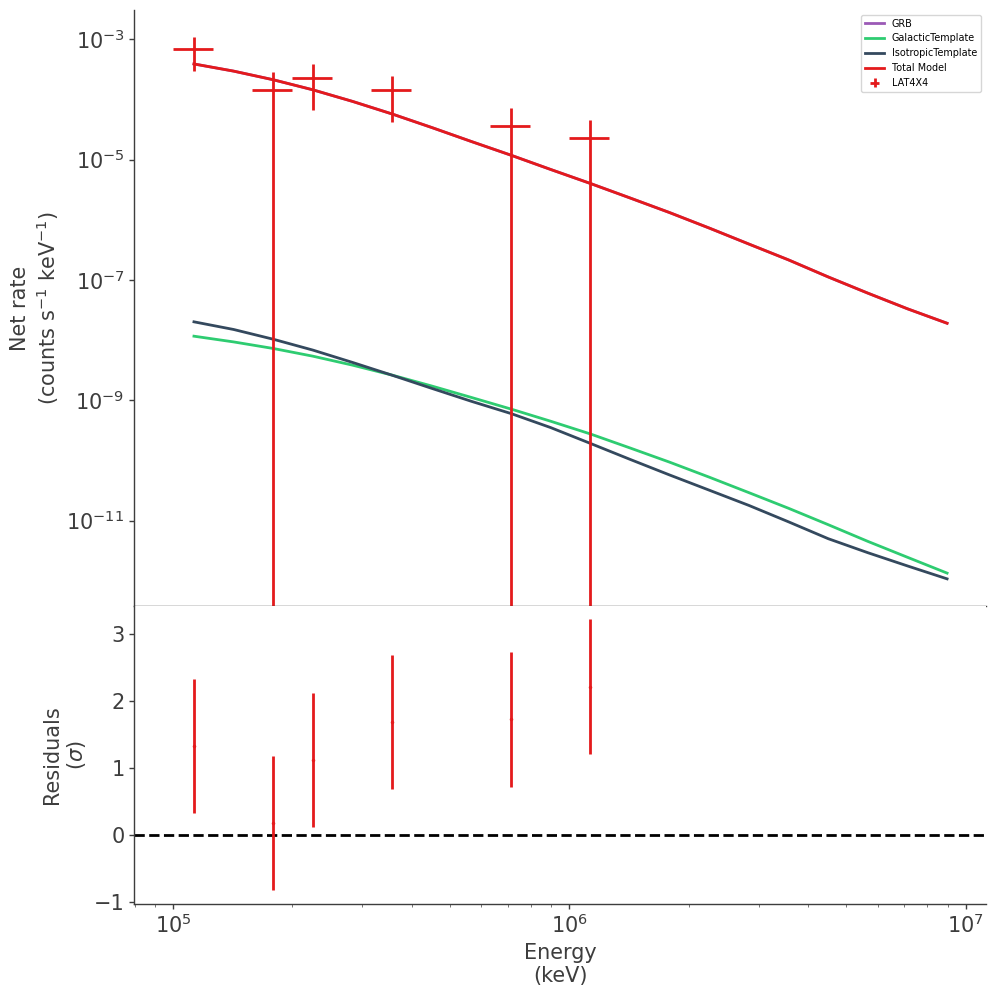

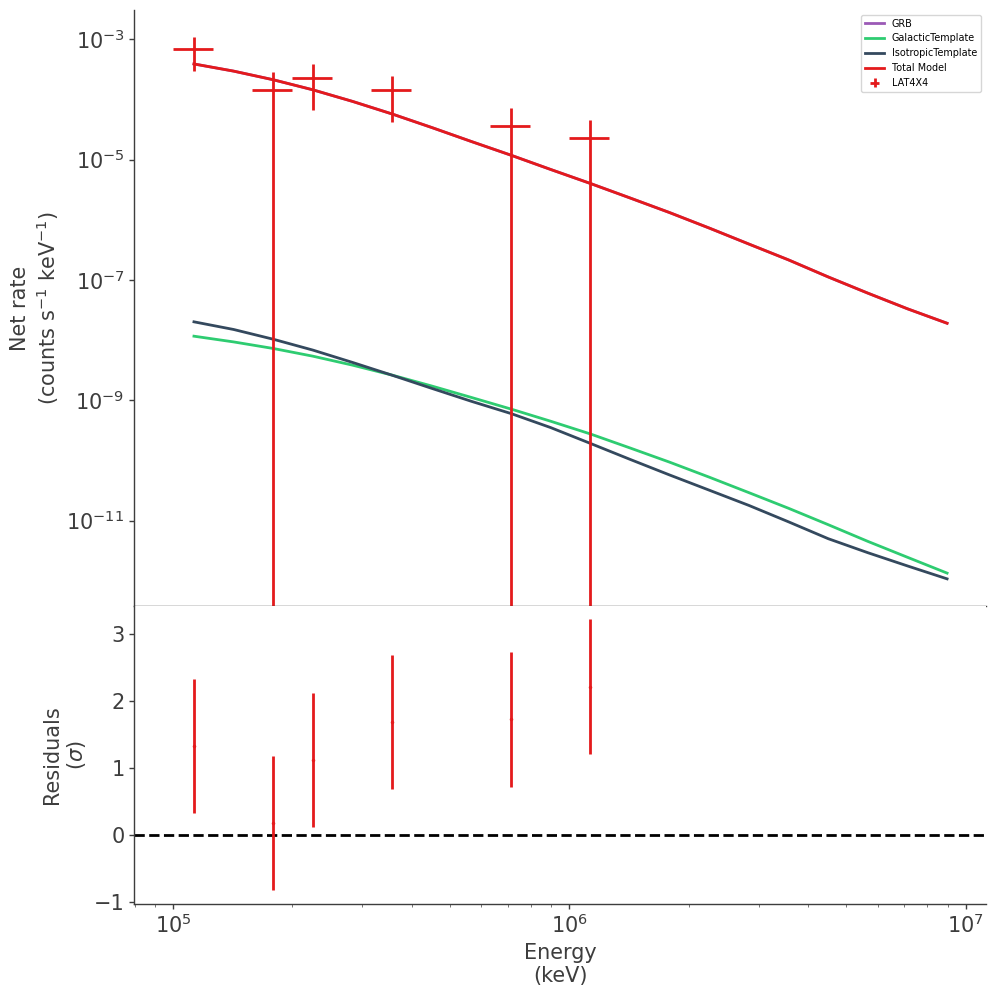

In [16]:
i = 3
T0, T1 = intervals[i], intervals[i + 1]
LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
jl = results[LAT_name]
jl.results.display()
display_spectrum_model_counts(jl, step=False, figsize=(10, 10))

We can see the evolution of the spectrum with time (not all the bins are diplayed):


02:24:40 DEBUG     adding child ra                                                                  ]8;id=526913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=640796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=885680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=320766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=908779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=674091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=94054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=638554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=527865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=980430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=924809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=71667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=557100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=210821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=414211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734329;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=283978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=678224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=282324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=583334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=609595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=992170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=25579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=700081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=214119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=28398;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=645573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587245;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=401165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=574325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=322273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=699459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471439;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=461858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=298829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=46606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=646056;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=851856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=86672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=852915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=748886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=373522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=983485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=666259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=307420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=137502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330948;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=398126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=494724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=337084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=518951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=222299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=456497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=811879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457198;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=512866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=817964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=566812;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=885879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=293597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=233385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893896;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=867787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=648978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=651140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=954819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=648711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=250169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=40483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=725049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=438187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=789188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=401531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=604592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=499685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=443523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=31603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=250694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=458342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=869914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=493869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=418493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=566675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=566667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=643850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=734298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=158254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=375005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=506729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=830761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=248960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=891657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=184049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=753411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=613711;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=322864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=386941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=193915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=721404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=259918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=530848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=636793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=700184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=699231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846042;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=157566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=431963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=582414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=964805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=620686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=443382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=71545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=829031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=545146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=970680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=696364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=677468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=124518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862813;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=347788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=346213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=160839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=173559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=341226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=35003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=503420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=321528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=22434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=303052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=811385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=428618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=65050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=814737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=750809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=447383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=430155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=633446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=493850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=126071;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=471715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=536978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=550087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=88875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=970934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=220155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=755791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=411252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=354034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=617532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=92978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=373634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=432316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=368007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=934436;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=344396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=85582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=270860;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=994290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=547016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=687600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=392865;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=802913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=890997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934950;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=476730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=27678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=57413;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=691714;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=963606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=296432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=246279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556539;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=487928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=925882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=203932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=543898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=896501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=914672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=630481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=921676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=342885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=390370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=626864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=954420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626202;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=67989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=462594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=211951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=594097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=304706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=737982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111510;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=117891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=485493;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=830323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=449640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=877387;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=530200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=770221;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=631785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=920185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=884642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=417075;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=990516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=793560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=55256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=727550;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=581596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=931972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=65675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=41369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=130886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=311138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=339391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=932966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=426150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=41369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=780159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=324559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=328560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=394652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=105941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=482229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522456;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=592943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=778976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=452724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=193272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=470859;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=640842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=652174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=703406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=553864;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878495;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=830679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=721559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=58257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=43462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=607426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=70021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=834328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:24:41 DEBUG     adding child b                                                                   ]8;id=600879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=589274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=171041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=473705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=733482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=553800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=460964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=231917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=443537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=926520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=778084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=777125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=740465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=494259;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=709951;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=401928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=373840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610676;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=133681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=74826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=922394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=867549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=456585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641764;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=435932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=375054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=926945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=244021;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=93279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=556301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=393861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=37918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=818591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=20348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=652422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=663485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=806293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=461857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=647337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=959233;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=590316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=35634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=64949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=109883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=417464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=957013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=8377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575588;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=729693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=203127;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=676267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=649672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=89319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=388131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=17199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=875269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=881846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=98210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=992774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=284319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=617420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=195672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673434;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=729297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=53177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=304825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=536028;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=267923;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601052;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=225396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=146611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=640473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=191617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=370109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=91611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=36872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=578962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=733708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=875914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=6425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=417846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=165661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=158785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=780555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=559457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=76817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=986819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=527803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=183682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=405589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=737708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=42664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=479916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=580928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=558969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=813032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=505531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=390603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=210364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=175076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=596557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=416089;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=579748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=928529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=301818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=433509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=18022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=454936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=777190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=568311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64684;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=270201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=387377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=353775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=777659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=706487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=984681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=413323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=735505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=811192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=732540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=892092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=96219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=369838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=312110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=482352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=716018;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=445878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=776064;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=981802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=690130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=299720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=202863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=984177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=951987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=223614;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=409773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=712929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=448097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=484871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=691160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=283769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=224531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=637938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=871891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=489945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=488674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=263391;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=299937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=229467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=115981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=385189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=907593;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=399452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=164041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=870513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=275555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64366;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=861617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=192057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=411796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=614110;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=591343;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=659925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=896863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=254104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=138852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54924;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=355179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=864662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=590558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=123457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=836266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=253507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=890766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=170816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59011;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=706952;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=243394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=130241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=441481;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=532849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=560834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=557656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=285759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=996856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=657315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=148491;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=567947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937887;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=745768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=938080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=316835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=747335;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=827768;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947107;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=879868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=843248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=825976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=796002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=538765;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=681288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=561069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=390692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=265716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=471829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=656525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=16008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=395514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=856293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=398246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281579;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=607781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=419666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=504628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=312169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=925872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=861074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=918820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=197268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=190331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95432;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=931501;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=258532;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=286003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=577244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=368525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=388447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196365;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=529168;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=342022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298895;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=960146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=595841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=617138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=439130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=483286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=174438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=367380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=265524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=521727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=353937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=878563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=457619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=461189;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=970688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=269801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=44103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=310248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=169774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=122774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=683006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=897783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=860514;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=542547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519627;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

processing MLE analyses:   0%|          | 0/13 [00:00<?, ?it/s]

         DEBUG     adding child ra                                                                  ]8;id=746600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=850735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=7810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=428455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=184982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=48999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=668017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=962663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=828954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28201;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=638977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=761508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=437379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=424033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=145640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=511191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=631254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=51195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=55049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=757204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=330289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=471194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=171861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=862297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=22967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75861;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=594406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=567973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=354555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=813584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=792069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=427740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=131717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=322560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=402334;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=714897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=153703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=360857;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=833979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=971660;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:24:54 DEBUG     adding child ra                                                                  ]8;id=421323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=16777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=7883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=185277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=550462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=472633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=504549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=894361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=253873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=822858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=180991;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=102796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=662946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=472680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471111;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=865596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=951414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=535900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=258826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=313671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=619388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=238603;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=762933;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=939272;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=327640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=263483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=852980;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249286;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=779129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863494;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=611708;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=255254;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=103288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212004;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=241256;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=528719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=318883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=27984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=184888;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=642993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:25:07 DEBUG     adding child ra                                                                  ]8;id=816583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=162309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=205731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=614346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=10999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=615184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=5648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=799508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=975305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=77758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=406555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=108766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=427297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=729379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=848746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848651;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=819487;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=888303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=947591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=904936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=54440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=201427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=244846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=361230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=570403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=575846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=262508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=690067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=355922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62082;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=512613;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=153801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=59173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=308686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=345586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=474351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=821248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=822612;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=196124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:25:32 DEBUG     adding child ra                                                                  ]8;id=316395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=240155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=88370;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=528471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=759735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=585129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=333648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=436833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=497876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=686604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=172617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=614389;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=371069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=582138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=197224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=140519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=672399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=825841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=500225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=61988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=99292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=15724;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=808917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=547665;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=616499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=968912;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=642971;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=840596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=487831;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=223000;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=749017;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=721274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=752342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=544935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=609762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=56966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=702102;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=641618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=549224;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=313148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:25:57 DEBUG     adding child ra                                                                  ]8;id=230314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=37459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=589638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=47879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581519;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=422742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=887308;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=649962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=605040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=566819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=419020;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=159322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=397694;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=572883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=349562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=53832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=379615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=62506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=650145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=626098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=802652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=693008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=845143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=768301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=701847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=19567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467395;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=946105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531562;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=810230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=396234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521997;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=625753;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=729266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=128553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=509543;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=879734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=248998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=403648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=516567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=814745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=639645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=182722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:26:22 DEBUG     adding child ra                                                                  ]8;id=600602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=675876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=721585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=497215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=856132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=683199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=257419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=657173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=554792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=142638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=302210;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=692408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=36835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=12274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=450554;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=406767;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=112990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=525616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=871068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=542690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=698290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=70173;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=759350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=281303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=19506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=839885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=516068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=21135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=949228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=904891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=77915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=181715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=582930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=427602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=816867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=403524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=979225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=604100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272336;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=743885;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=481105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:26:45 DEBUG     adding child ra                                                                  ]8;id=322428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=273871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=494034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=724203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116918;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=219587;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=839893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=227849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=336890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=321252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=607008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=499893;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=876547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=905743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=253038;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=137288;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=438681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=114638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=81750;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=263140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=143577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=617408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=231695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=457416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=621204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=879170;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=307976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=182092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=229194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=134905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=686068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=931441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=493128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931929;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=904076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=522183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=304791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=440024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=562321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=855589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=971282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=453621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=429590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=889586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:27:04 DEBUG     adding child ra                                                                  ]8;id=798927;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=916299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=550243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=158454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=427647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=303311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=303938;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=972169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=858949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=18656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=338171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=285204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=722191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=314706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=36763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=847661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=926578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=440658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=867873;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932258;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=285808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=244100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=638902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=521511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=929880;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=858619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=141467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=270269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=965251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=928966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=673363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=430858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=479653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=963731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=649390;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=343718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=658194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=801147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=75303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=95755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317139;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:27:29 DEBUG     adding child ra                                                                  ]8;id=733055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=467686;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=789234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306404;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=873823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=898507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=22037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=890156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=501793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=297474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=796586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=124741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=345131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=198008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=447707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=926745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=190084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=490478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=806898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=348899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=696119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=448409;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=536682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=141174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=132582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=461982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=714474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=321282;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=545850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=23489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=493692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=235503;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=500925;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=137653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=144157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=232137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=29841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=957584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=384907;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=183085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=354184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=335740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:27:52 DEBUG     adding child ra                                                                  ]8;id=428540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=758650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=13780;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=184206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=380904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=981683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163490;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=110446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=390807;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59243;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=787856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209821;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=304726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=669396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=798842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=554190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=733228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=843742;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=611775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=150788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691470;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=543736;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=131014;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=909949;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=64871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=311452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=721748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=461653;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=53735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=144729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=719414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=117180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=717792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=665644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=112963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=81353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=538693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=436561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=785312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=295619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=412263;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=809879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=863783;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=827657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=412533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52162;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:28:18 DEBUG     adding child ra                                                                  ]8;id=838871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=661260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=551180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=446774;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=569169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=784497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=253610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:28:19 DEBUG     adding child F                                                                   ]8;id=456429;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=976771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=225974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=859615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176468;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=281618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=549515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=699426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=870695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=157222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=244200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=751659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=635351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=720528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=612856;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=896977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=266530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=427152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=404113;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850135;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=434166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=523624;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=510883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943333;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=825591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=865452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=446092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280679;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=481418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=526999;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=450083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=315373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=379363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=857894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867601;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=925960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=867262;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=66910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=695464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:28:42 DEBUG     adding child ra                                                                  ]8;id=909815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=409184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=935241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=981835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=904229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=617541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=595528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=510858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=136989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=760051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=786473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=922965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=936238;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=498383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=695755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=135828;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=360125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=239761;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=894528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=11013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=277420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=443722;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=9280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=584466;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=895143;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=746527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17598;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=122509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=781557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=897131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=432142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=774848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=617541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=68396;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=912237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=565852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=73302;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=79770;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=51977;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=692166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14535;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:29:07 DEBUG     adding child ra                                                                  ]8;id=349422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=652703;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=337962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381381;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=630549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=551760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=904966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=262528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=891362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=199006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=194740;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=443688;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=719998;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=216044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=596229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=643078;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=46943;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=440932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=326406;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=687076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=388166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=670485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442081;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=221047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606986;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=136171;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=742199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=79683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=586802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=400756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=139380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=648817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966513;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=448166;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=52620;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=607656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=131789;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=199129;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=868802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=928596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=348798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=857141;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=573451;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=28867;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=139667;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

02:29:30 DEBUG     converting MeV to MeV                                                          ]8;id=977609;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py\model_plot.py]8;;\:]8;id=314796;file:///Users/runner/work/threeML/threeML/threeML/io/plotting/model_plot.py#890\890]8;;\

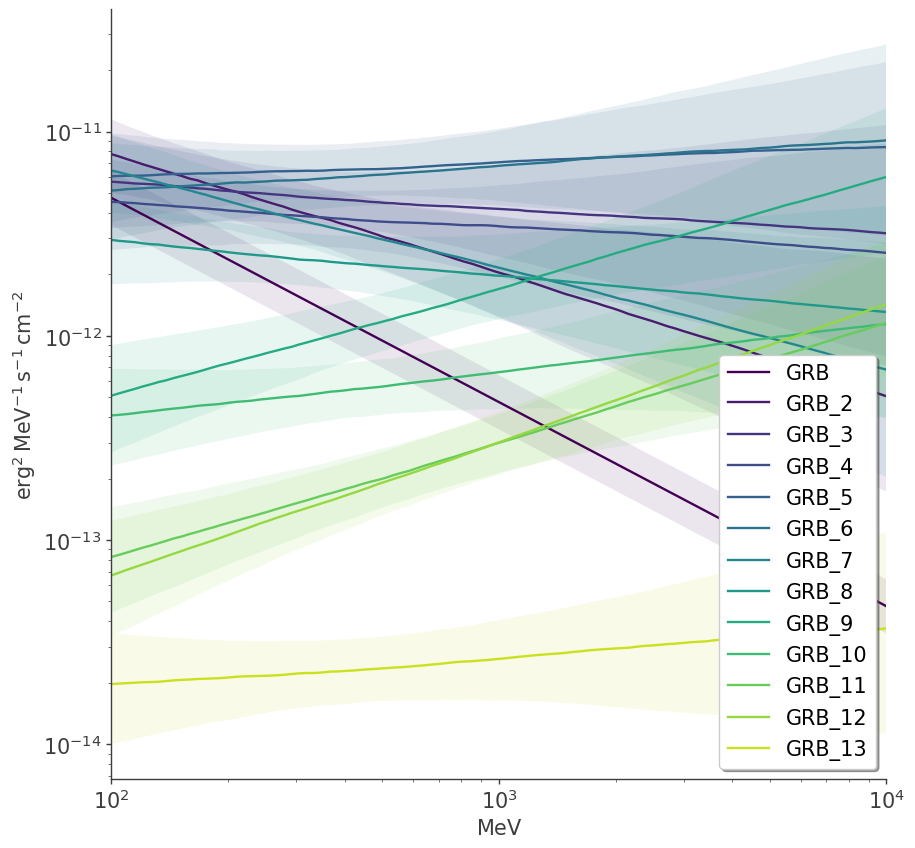

In [17]:
fig = plot_spectra(
    *[results[k].results for k in list(results.keys())[::2]],
    ene_min=100 * u.MeV,
    ene_max=10 * u.GeV,
    flux_unit="erg2/(cm2 s MeV)",
    energy_unit="MeV",
    fit_cmap="viridis",
    contour_cmap="viridis",
    contour_style_kwargs=dict(alpha=0.1)
)
fig.set_size_inches(10, 10)

Finally, we can display flux lightcurves and index evolution with time.


02:29:32 DEBUG     adding child ra                                                                  ]8;id=837176;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=622476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=329298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=523372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135338;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=858217;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=255726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=798574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=895611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=166128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=867331;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=472792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=508639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=958792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=434497;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=447326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=982326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=405600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=842295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=927583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=875858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=466609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=265538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=878589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=36199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=264211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=722892;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=795721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=209023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=96094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=291791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=907312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=972819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=56123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=621955;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=682442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=592845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=389718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=471834;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848792;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_GalacticTemplate_Value                                       ]8;id=842351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=268917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_GalacticTemplate_Value                                      ]8;id=439878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=451441;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT2X3_IsotropicTemplate_Normalization                              ]8;id=902250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=787150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT2X3_IsotropicTemplate_Normalization                             ]8;id=388733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646917;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=448727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=878330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=704879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=901296;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=855098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=231373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=404534;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=756689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=231628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=383659;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=111525;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=990810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=673368;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=587748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=289675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=473639;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=934558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=15590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30577;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=484482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=822097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=233095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=933725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=768009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=392496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90085;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=532469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=479564;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=339876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593634;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=153677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=297781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=359239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=450348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=683371;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=304357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=965035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=124471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=394643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=208013;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500818;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=113870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=202802;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_GalacticTemplate_Value                                       ]8;id=463067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=161869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_GalacticTemplate_Value                                      ]8;id=65070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=176649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X3_IsotropicTemplate_Normalization                              ]8;id=974574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X3_IsotropicTemplate_Normalization                             ]8;id=402320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=303841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=986557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=463970;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711575;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=483804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=998941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=628706;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=625931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757223;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=429947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=704879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=444652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=893207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=219540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=852845;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=517649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=810278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=174735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=807196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=415392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=860460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=141777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=500552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=724067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113573;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=963898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=320174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=937106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=366854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=932524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=41875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=960117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=558775;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=199096;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=790364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=517642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_GalacticTemplate_Value                                       ]8;id=198244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331115;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_GalacticTemplate_Value                                      ]8;id=570984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=688300;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT3X4_IsotropicTemplate_Normalization                              ]8;id=80628;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850273;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT3X4_IsotropicTemplate_Normalization                             ]8;id=690488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=983314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=667699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=902037;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317911;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=158401;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=156244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=653167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737361;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=533478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983700;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=730407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=712298;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196833;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=896301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=920383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=813766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=256277;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=744049;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=63581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=387145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=777344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=185609;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=883615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=820087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=454150;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=745748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=291036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=644363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=454781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730600;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=733471;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=773897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=616842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=927530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=597125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=99570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=601805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=528989;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=565203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=377267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=445279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_GalacticTemplate_Value                                       ]8;id=372626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_GalacticTemplate_Value                                      ]8;id=506453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=361683;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X4_IsotropicTemplate_Normalization                              ]8;id=661032;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=541615;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X4_IsotropicTemplate_Normalization                             ]8;id=342733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=238449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=581745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=144200;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=441438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=300747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=883248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=398159;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=669819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=861394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=327751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=840108;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=792230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=633680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=877931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=124363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=993583;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=87117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=509364;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=970363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=432146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=870696;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=453249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=622595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=620702;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=497249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=824074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=313125;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=726958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=24568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=826041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=329682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=621568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=209109;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=171138;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=199842;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=619496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=403889;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=940230;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=952214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=467416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=956926;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_GalacticTemplate_Value                                       ]8;id=499239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=23673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_GalacticTemplate_Value                                      ]8;id=613661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT4X5_IsotropicTemplate_Normalization                              ]8;id=26236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=365717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT4X5_IsotropicTemplate_Normalization                             ]8;id=377718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=432967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=822106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380005;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=865841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=723541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=296299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=573119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=920854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=623957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=95086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=547549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=366669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734179;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=654797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=601630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=989175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=817316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=594823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=206504;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=412216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=688846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374297;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=70402;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=20057;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=218746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=381458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=524962;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408531;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=759656;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=720751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=724393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=973606;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=6556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=63407;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=783690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=596289;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=513595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=71326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=772386;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=205433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=270589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=969883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884278;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=628837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=846299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=618901;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37353;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=134357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=259360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=600068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=320422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=742594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492875;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=458183;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=171092;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

02:29:33 DEBUG     adding child index                                                               ]8;id=286267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=237937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=782655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933003;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=325619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=385786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=895748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=635900;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=867839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=228964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=794631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=682093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=661253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=40500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=788655;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=141990;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=858190;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=14412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=939591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=841;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=899959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=408545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=858372;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=400074;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=610690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=669848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=245265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=477417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=140355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=949065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_GalacticTemplate_Value                                       ]8;id=649116;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=60181;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_GalacticTemplate_Value                                      ]8;id=693800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=465119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X5_IsotropicTemplate_Normalization                              ]8;id=35276;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=295973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X5_IsotropicTemplate_Normalization                             ]8;id=604983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=275112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=432803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=508167;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=989053;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=167840;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=94756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=316710;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=403940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=845866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=459894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=910043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=943382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=255631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=721261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=875725;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=336330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=63195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=473610;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=331040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=930156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=535100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=84421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=78763;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=885823;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524146;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=739720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=563964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=174846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=256030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=221461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=316035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=805963;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=588847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=175447;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=625469;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788922;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=422701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160979;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=494870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=929375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=704815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=336973;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=182643;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_GalacticTemplate_Value                                       ]8;id=953477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_GalacticTemplate_Value                                      ]8;id=33467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=101426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT5X6_IsotropicTemplate_Normalization                              ]8;id=235747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=884794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT5X6_IsotropicTemplate_Normalization                             ]8;id=802250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=39891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=967838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=388533;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=499346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=282748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=56635;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=99652;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=329515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=731453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=16240;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=797904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=876720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=903668;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=997937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=888524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=632981;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=445249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=736126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=173672;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=71393;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=68022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=867145;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=378582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=302184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=944772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284701;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=807360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=955377;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=243255;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=512380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=832540;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=552619;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=712474;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=260707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=588342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=789249;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=987443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=981595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923518;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=246811;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788267;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_GalacticTemplate_Value                                       ]8;id=196175;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_GalacticTemplate_Value                                      ]8;id=555169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=741985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X6_IsotropicTemplate_Normalization                              ]8;id=332421;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=835515;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X6_IsotropicTemplate_Normalization                             ]8;id=85729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=422640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=631488;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=498347;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=788112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=529008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=412752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=185022;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728337;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=240055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=314863;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=324858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=264360;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=523548;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=65944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=961317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=563689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=386465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=265415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757626;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=47817;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=380416;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=396437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947913;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=599648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=444984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=800566;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=969581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=441782;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776849;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=895378;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=102852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=113640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=823382;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=623542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=710868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691437;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=52975;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=711120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=952829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=880114;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=841557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=840031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=640551;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=842570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359070;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_GalacticTemplate_Value                                       ]8;id=394799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=103681;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_GalacticTemplate_Value                                      ]8;id=822567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=819552;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT6X7_IsotropicTemplate_Normalization                              ]8;id=745414;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=795105;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT6X7_IsotropicTemplate_Normalization                             ]8;id=88882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=800208;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=430585;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=684625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=472363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=424332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=442340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=420430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=79743;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=681507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=727894;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=580691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=547748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=486680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=562578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=401576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=540505;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=886647;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=160781;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=950147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=263574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=841165;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=702140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=788618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991536;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=422455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246346;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=531126;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=75222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=518241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=874419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=454903;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=502219;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=10784;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=753025;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=951196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=823307;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=980299;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=174568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=298608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=806960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179804;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=883848;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=964269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=866132;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=280072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=282779;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=598633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=90051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=982787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96186;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=8094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=551914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=625191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=971695;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524872;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=383250;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=263103;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=372771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=630367;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=885084;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=12160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=377340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=734358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=959844;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=476957;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=664942;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=182261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=812851;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=912646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=172489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=300507;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=670222;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=541855;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561283;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=655460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=31524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=722581;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=947946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=270184;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=559776;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=298455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=790083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=793154;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=839567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=502422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=778658;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=747747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=305935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=5669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=423128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=977645;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945236;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=647187;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=461496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=922629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=74805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_GalacticTemplate_Value                                       ]8;id=351568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=306508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_GalacticTemplate_Value                                      ]8;id=810777;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=646023;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X7_IsotropicTemplate_Normalization                              ]8;id=128529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=638095;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X7_IsotropicTemplate_Normalization                             ]8;id=27180;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=236691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=620919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=553726;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=504131;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=904852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=726316;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=276033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=247862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=45026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=171012;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=266486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=507966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=35426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=212204;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=581142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=52080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=604756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=646563;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=159117;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=59866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=56218;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=715006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=756557;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=812460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=354803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=250403;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=168604;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=429705;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=561461;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=317207;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=9527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=637512;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=534151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=938351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=945045;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97137;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=576808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=624937;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=667385;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=619870;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=916839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=829380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_GalacticTemplate_Value                                       ]8;id=24211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=471904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_GalacticTemplate_Value                                      ]8;id=960954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT7X8_IsotropicTemplate_Normalization                              ]8;id=458718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=994914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT7X8_IsotropicTemplate_Normalization                             ]8;id=547031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=186720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=822522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=358793;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=246293;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=363006;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=672580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=10151;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=510260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=384213;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=191453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=583425;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=411915;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=537546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=95744;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17830;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=273311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=170169;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=117858;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=593464;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=570472;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=998578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=674594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=606290;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=59838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=69741;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=954808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=765709;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=971666;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=856047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=563234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=850157;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=175727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=211966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771941;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=139687;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=128304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=376985;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=754773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=689019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=730916;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=605086;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=410738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=7035;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=572251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=289967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=152216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_GalacticTemplate_Value                                       ]8;id=438556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=655785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_GalacticTemplate_Value                                      ]8;id=392275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X8_IsotropicTemplate_Normalization                              ]8;id=946087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=127041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X8_IsotropicTemplate_Normalization                             ]8;id=537310;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=337448;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=71898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=540478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=721149;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94415;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=780068;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=845069;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=2773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=896375;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=469629;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=368477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=752182;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=527650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=857974;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=889675;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=777465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=443344;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=38650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=823449;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=843869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=292852;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=511160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=218196;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665642;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=206719;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=534919;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=608408;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=656363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=731846;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=651351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=409580;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=81746;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=766363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=286355;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=926756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=586544;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=239611;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=501897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=30313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=719234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=665664;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=699007;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=618729;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=136640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=685257;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=140670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_GalacticTemplate_Value                                       ]8;id=92589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=719024;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_GalacticTemplate_Value                                      ]8;id=718458;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=658428;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT8X9_IsotropicTemplate_Normalization                              ]8;id=198788;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=692008;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT8X9_IsotropicTemplate_Normalization                             ]8;id=933199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=374174;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=30728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761559;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=197738;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=862570;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=610362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261671;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=202556;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=958226;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=895932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=758561;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=74292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=319549;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=363944;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=871104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=706430;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=568721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=362036;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=761040;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=540759;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=375796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=748760;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=43216;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=471734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859130;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=790590;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=515311;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=522440;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=122839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=29419;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=257237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

02:29:34 DEBUG     path is now: GRB.position                                                       ]8;id=379340;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=341486;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=321810;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=848832;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=229716;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=737569;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=871072;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278978;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=205048;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=990958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=994976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=242327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=196379;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_GalacticTemplate_Value                                      ]8;id=478397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=823728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_GalacticTemplate_Value                                     ]8;id=210646;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=687717;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT9X10_IsotropicTemplate_Normalization                             ]8;id=181815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933431;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT9X10_IsotropicTemplate_Normalization                            ]8;id=806325;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=561455;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=972591;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=47636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=927442;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=217506;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=773835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=293771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=246067;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=885405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=416529;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=414930;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=610411;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=706727;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=357091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=4547;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=995121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=946584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=155;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=170630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=822994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=827140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=563140;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=15568;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=142453;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=813122;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=578988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763866;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=637538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=17530;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=515264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=44228;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=852878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=331617;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=547033;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=249636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=773324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=230059;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=724241;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662996;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=947319;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=853314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=51662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=498477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=789747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=986882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=408323;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=529622;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_GalacticTemplate_Value                                     ]8;id=750253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=240264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_GalacticTemplate_Value                                    ]8;id=112016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=548188;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT10X12_IsotropicTemplate_Normalization                            ]8;id=374968;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118897;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT10X12_IsotropicTemplate_Normalization                           ]8;id=692806;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=405417;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=297516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=162751;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=847745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407976;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=517791;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=903586;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=532192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154128;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=938177;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=932797;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=343502;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=599073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=430452;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=382553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=370879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573616;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=147877;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=201602;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=734697;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=964835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=261106;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=508235;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=746124;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=104803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=200147;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=734142;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=531862;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=149450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562426;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=829785;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=110454;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=623680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=333809;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=702112;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=645499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=660412;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=280790;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=289936;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=116715;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=388796;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=828843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=845608;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=478966;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=782669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=739244;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_GalacticTemplate_Value                                     ]8;id=271384;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=767459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_GalacticTemplate_Value                                    ]8;id=202721;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=893669;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT12X14_IsotropicTemplate_Normalization                            ]8;id=406477;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=942555;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT12X14_IsotropicTemplate_Normalization                           ]8;id=123215;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=967465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=612931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=845956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=739631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=639482;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=689330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=945826;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=608410;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=214291;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=658252;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=730420;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=915498;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=34264;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=932352;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=844728;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=439713;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=417044;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=763500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=197674;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=204248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=457063;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=590545;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=968752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=704305;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=999732;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=546197;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=924270;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=316837;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=916945;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=790055;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=577902;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=979678;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490558;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=234967;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=520320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=59499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=775094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=117589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=138327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=76597;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=863209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=342589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=115090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=88904;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=539444;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=742959;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=923553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_GalacticTemplate_Value                                     ]8;id=630633;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=931869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_GalacticTemplate_Value                                    ]8;id=908689;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=991026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT14X17_IsotropicTemplate_Normalization                            ]8;id=459839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=351450;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT14X17_IsotropicTemplate_Normalization                           ]8;id=60351;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=148878;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=210940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=524015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=156500;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=367328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=900260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=560093;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=259682;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=383704;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=211589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=598829;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=892553;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=573405;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=436229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=803418;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=661508;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=582747;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=679350;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=254097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=881987;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=514815;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=843993;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=244211;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=151274;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=748800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=420427;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=89087;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=144303;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=767522;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=129693;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=139076;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=122041;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=235969;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=503253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=210527;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=647733;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=206388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=562567;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=555459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=934772;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=915301;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=187589;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=466065;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3541;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=466247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246339;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_GalacticTemplate_Value                                     ]8;id=905445;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=680423;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_GalacticTemplate_Value                                    ]8;id=914031;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=918476;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT17X21_IsotropicTemplate_Normalization                            ]8;id=427271;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332119;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT17X21_IsotropicTemplate_Normalization                           ]8;id=839457;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=757446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=552632;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=369576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=255762;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=533287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=608373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=960935;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=540321;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=705332;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=559663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=776326;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=459309;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=327324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=652745;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=600940;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=828516;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=428546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=914348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=135843;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=540850;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=490596;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=922769;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=728883;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=352787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=245771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=500947;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=575931;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=196206;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=179156;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=718582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=786100;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=374827;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=246988;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=635265;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=46098;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=323511;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=342661;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=617358;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=338203;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=243251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=332816;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=438248;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=476388;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=683794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=973123;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=919755;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=86199;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=778691;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=868932;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_GalacticTemplate_Value                                     ]8;id=377002;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=974546;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_GalacticTemplate_Value                                    ]8;id=528636;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=602120;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT21X30_IsotropicTemplate_Normalization                            ]8;id=608422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=366380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT21X30_IsotropicTemplate_Normalization                           ]8;id=575699;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=771496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=622800;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=738342;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=327083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=73050;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=904467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=977315;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=501227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=57229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=314799;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=335009;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=655280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=641630;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=225046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=873292;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=803192;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267657;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=508354;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=437876;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=875209;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=770773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=322928;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=872899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=219304;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=163392;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=217946;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=154898;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=370574;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=626618;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=259730;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=228489;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=621253;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=475958;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=866399;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660394;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=197237;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=359016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=398899;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=966803;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=124229;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=407383;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=635030;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=660091;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=721869;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=196625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=632571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=634537;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=776638;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=679625;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_GalacticTemplate_Value                                     ]8;id=980251;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=601287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_GalacticTemplate_Value                                    ]8;id=77016;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=102983;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT30X40_IsotropicTemplate_Normalization                            ]8;id=232318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=525882;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT30X40_IsotropicTemplate_Normalization                           ]8;id=607805;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=356294;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=464820;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=470473;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=95312;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=67362;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=219677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=807054;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=551438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=59496;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=424194;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=294484;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=962287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=902324;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=27594;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=691720;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=132234;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=264433;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=447080;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=793637;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=913542;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=54062;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=941328;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=256034;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=45467;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=944261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=759320;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=579231;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=5483;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=11847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=34376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=564357;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=480982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=3161;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=328097;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=168685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=31462;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=761631;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=4520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=97670;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=910690;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=278960;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=747051;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=267509;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=175144;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=158891;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=49287;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=409322;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=31766;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=492921;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_GalacticTemplate_Value                                     ]8;id=297446;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=83560;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_GalacticTemplate_Value                                    ]8;id=819242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=685094;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT40X48_IsotropicTemplate_Normalization                            ]8;id=594819;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526771;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT40X48_IsotropicTemplate_Normalization                           ]8;id=755890;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=615160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=262871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=983718;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=999239;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=272825;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=125306;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=281752;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=356275;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=149758;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=290479;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241748;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=533460;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=694584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=396061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=937798;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=726438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=284148;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=622839;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=683737;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=808735;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=417193;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=710459;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=725621;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=880314;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=591083;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=870961;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=206478;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=128524;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=96680;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=399104;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=464595;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=222380;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=339465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=732214;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=84578;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=35673;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=222247;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=4871;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=260972;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=524026;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=213934;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=127029;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=262663;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=863707;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=624801;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=469528;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=433280;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=658584;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=883225;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_GalacticTemplate_Value                                     ]8;id=882571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859061;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_GalacticTemplate_Value                                    ]8;id=113313;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=603101;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT48X73_IsotropicTemplate_Normalization                            ]8;id=261994;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=587773;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT48X73_IsotropicTemplate_Normalization                           ]8;id=517982;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=831266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child ra                                                                  ]8;id=337191;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=463246;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.ra                                                        ]8;id=967868;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=825047;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child dec                                                                 ]8;id=600279;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=16485;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: position.dec                                                       ]8;id=85327;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=526520;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child F                                                                   ]8;id=349662;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=933397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.F                                                    ]8;id=302964;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=754853;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child index                                                               ]8;id=923242;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=597422;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.index                                                ]8;id=392317;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=241847;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child a                                                                   ]8;id=470576;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=493269;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.a                                                    ]8;id=311373;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=55685;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child b                                                                   ]8;id=700906;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=781121;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: Powerlaw_flux.b                                                    ]8;id=364152;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=58010;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child Powerlaw_flux                                                       ]8;id=892886;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=489261;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.Powerlaw_flux                                                 ]8;id=160027;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=546649;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child polarization                                                        ]8;id=729879;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=94954;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: main.polarization                                                  ]8;id=501648;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=519787;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child position                                                            ]8;id=420077;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=364295;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.position                                                       ]8;id=95965;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=66345;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child main                                                                ]8;id=324956;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=707571;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: spectrum.main                                                      ]8;id=144756;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=247397;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child spectrum                                                            ]8;id=718808;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=37910;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB.spectrum                                                       ]8;id=105330;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=844266;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child GRB                                                                 ]8;id=93757;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=662914;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: GRB                                                                ]8;id=726058;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=914582;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_GalacticTemplate_Value                                    ]8;id=985348;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=859731;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_GalacticTemplate_Value                                   ]8;id=455088;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=627376;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

         DEBUG     adding child LAT73X172_IsotropicTemplate_Normalization                           ]8;id=901133;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=118268;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#89\89]8;;\

         DEBUG     path is now: LAT73X172_IsotropicTemplate_Normalization                          ]8;id=934185;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py\node_type.py]8;;\:]8;id=608212;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/node_type.py#180\180]8;;\

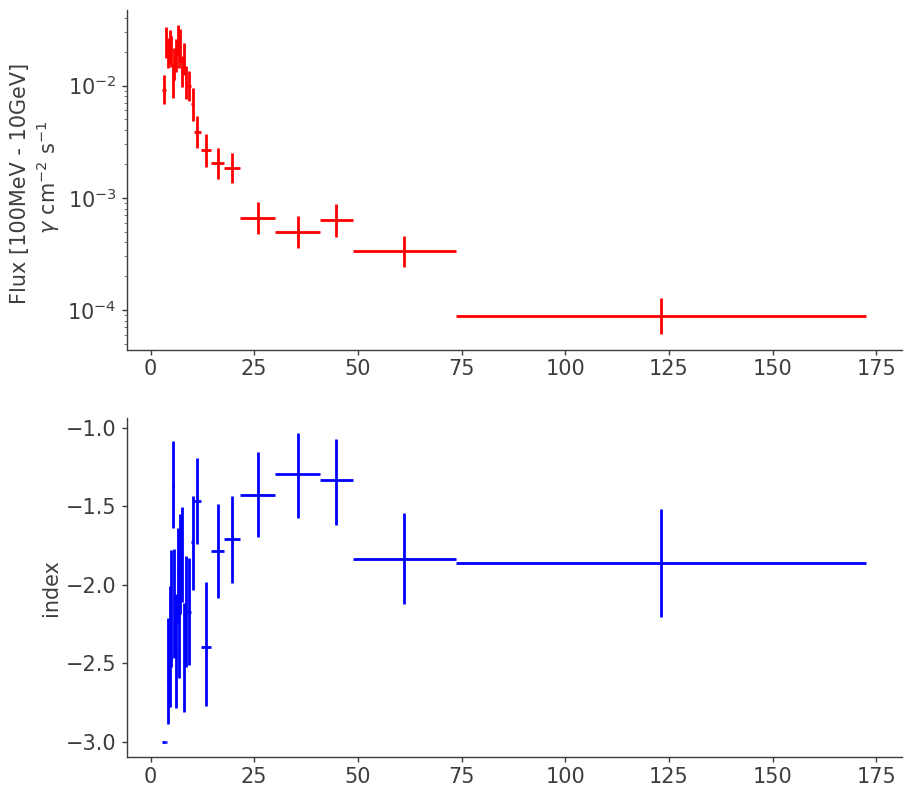

In [18]:
variates = ["F", "index"]
y = {}
for n in variates:
    y[n] = []
    y[n + "_p"] = []
    y[n + "_n"] = []
x = []
dx = []


for T0, T1 in zip(intervals[:-1], intervals[1:]):
    LAT_name = "LAT_%06.3f-%06.3f" % (T0, T1)
    x.append((T1 + T0) / 2)
    dx.append((T1 - T0) / 2)
    jl = results[LAT_name]
    res = jl.results
    mod = res.optimized_model
    ps = mod.point_sources

    for n in variates:
        my_variate = res.get_variates("GRB.spectrum.main.Powerlaw_flux.%s" % n)
        y[n].append(my_variate.median)
        y[n + "_p"].append(my_variate.equal_tail_interval()[1] - my_variate.median)
        y[n + "_n"].append(my_variate.median - my_variate.equal_tail_interval()[0])
        pass
    pass

fig = plt.figure(figsize=(10, 15))
colors = ["r", "b"]
ylabels = ["Flux [100MeV - 10GeV] \n $\gamma$ cm$^{-2}$ s$^{-1}$", "index"]
for i, n in enumerate(variates):
    plt.subplot(len(variates) + 1, 1, i + 1)
    plt.errorbar(x, y[n], xerr=dx, yerr=(y[n + "_n"], y[n + "_p"]), ls="", c=colors[i])
    if i == 0:
        plt.yscale("log")
    # plt.xscale('log')
    plt.ylabel(ylabels[i])
    pass